# PROYECTO EASY MONEY. GRUPO 3

# PARTE 1. ANÁLISIS

In [1]:
#Librerías básicas
import numpy as np      #algebra lineal
import pandas as pd     #data processing
pd.set_option("display.max_rows", 200)  
pd.options.display.float_format = '{:,.2f}'.format   #cambio del formato de decimales
import datetime
import time

#Librerías para plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")


# Otros
RANDOM_STATE=42

In [2]:
# Datos:
products=pd.read_csv("products_df.csv", sep=",")
commercial=pd.read_csv("commercial_activity_df.csv", sep=",")
sociodemo=pd.read_csv("sociodemographic_df.csv", sep=",")

## 0. Análisis de datasets

### Products

In [6]:
products.head(30).T

0           1           2           3   \
Unnamed: 0                   0           1           2           3   
pk_cid                 1375586     1050611     1050612     1050613   
pk_partition        2018-01-28  2018-01-28  2018-01-28  2018-01-28   
short_term_deposit           0           0           0           1   
loans                        0           0           0           0   
mortgage                     0           0           0           0   
funds                        0           0           0           0   
securities                   0           0           0           0   
long_term_deposit            0           0           0           0   
em_account_pp                0           0           0           0   
credit_card                  0           0           0           0   
payroll                   0.00        0.00        0.00        0.00   
pension_plan              0.00        0.00        0.00        0.00   
payroll_account              0           0           0           0   
emc_account                  0           0           0           0   
debit_card                   0           0           0           0   
em_account_p                 0           0           0           0   
em_acount                    1           1           1           0   

                            4           5           6           7   \
Unnamed: 0                   4           5           6           7   
pk_cid                 1050614     1050615     1050616     1050617   
pk_partition        2018-01-28  2018-01-28  2018-01-28  2018-01-28   
short_term_deposit           0           0           0           0   
loans                        0           0           0           0   
mortgage                     0           0           0           0   
funds                        0           0           0           0   
securities                   0           0           0           0   
long_term_deposit            0           0           0           0   
em_account_pp                0           0           0           0   
credit_card                  0           0           0           0   
payroll                   0.00        0.00        0.00        0.00   
pension_plan              0.00        0.00        0.00        0.00   
payroll_account              0           0           0           0   
emc_account                  0           0           0           0   
debit_card                   0           0           0           0   
em_account_p                 0           0           0           0   
em_acount                    1           1           1           1   

                            8           9   ...          20          21  \
Unnamed: 0                   8           9  ...          20          21   
pk_cid                 1050619     1050620  ...     1050582     1050586   
pk_partition        2018-01-28  2018-01-28  ...  2018-01-28  2018-01-28   
short_term_deposit           0           0  ...           0           0   
loans                        0           0  ...           0           0   
mortgage                     0           0  ...           0           0   
funds                        0           0  ...           0           0   
securities                   0           0  ...           0           0   
long_term_deposit            0           0  ...           0           0   
em_account_pp                0           0  ...           0           0   
credit_card                  0           0  ...           0           0   
payroll                   0.00        0.00  ...        0.00        0.00   
pension_plan              0.00        0.00  ...        0.00        0.00   
payroll_account              0           0  ...           0           0   
emc_account                  0           0  ...           0           0   
debit_card                   0           0  ...           0           1   
em_account_p                 0           0  ...           0           0   
em_acount       

In [7]:
# Implementamos una función para extraer la información básica de cada dataset:
def informe_df(df, verbose = True):
    print(df.info(verbose = verbose))
    total_nulos = df.isnull().sum().sum()
    print()
    print(f"Total de nulos: {total_nulos}")
    print(df.describe(include="object").T)
    print(df.describe(include=np.number).T)

In [8]:
informe_df(products, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   pk_cid              int64  
 2   pk_partition        object 
 3   short_term_deposit  int64  
 4   loans               int64  
 5   mortgage            int64  
 6   funds               int64  
 7   securities          int64  
 8   long_term_deposit   int64  
 9   em_account_pp       int64  
 10  credit_card         int64  
 11  payroll             float64
 12  pension_plan        float64
 13  payroll_account     int64  
 14  emc_account         int64  
 15  debit_card          int64  
 16  em_account_p        int64  
 17  em_acount           int64  
dtypes: float64(2), int64(15), object(1)
memory usage: 818.9+ MB
None

Total de nulos: 122
                count unique         top    freq
pk_partition  5962924     17  2019-05-28  442995
                          count       

### Commercial Activity

In [9]:
commercial.head().T

0                   1                   2  \
Unnamed: 0                       0                   1                   2   
pk_cid                     1375586             1050611             1050612   
pk_partition            2018-01-28          2018-01-28          2018-01-28   
entry_date              2018-01-12          2015-08-10          2015-08-10   
entry_channel                  KHL                 KHE                 KHE   
active_customer               1.00                0.00                0.00   
segment          02 - PARTICULARES  03 - UNIVERSITARIO  03 - UNIVERSITARIO   

                                  3                   4  
Unnamed: 0                        3                   4  
pk_cid                      1050613             1050614  
pk_partition             2018-01-28          2018-01-28  
entry_date               2015-08-10          2015-08-10  
entry_channel                   KHD                 KHE  
active_customer                0.00                1.00  
segment          03 - UNIVERSITARIO  03 - UNIVERSITARIO

In [10]:
informe_df(commercial, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   pk_cid           int64  
 2   pk_partition     object 
 3   entry_date       object 
 4   entry_channel    object 
 5   active_customer  float64
 6   segment          object 
dtypes: float64(1), int64(2), object(4)
memory usage: 318.5+ MB
None

Total de nulos: 266977
                 count unique                 top     freq
pk_partition   5962924     17          2019-05-28   442995
entry_date     5962924   1499          2017-07-28    57389
entry_channel  5829891     68                 KHE  3113947
segment        5828980      3  03 - UNIVERSITARIO  3900166
                       count         mean          std       min          25%  \
Unnamed: 0      5,962,924.00 7,155,425.01 3,920,784.28      0.00 4,240,385.75   
pk_cid          5,962,924.00 1,234,929.80   162,302.04 15,891.00 1,1

### Sociodemographic

In [11]:
sociodemo.head(30).T

0           1           2           3           4   \
Unnamed: 0             0           1           2           3           4   
pk_cid           1375586     1050611     1050612     1050613     1050614   
pk_partition  2018-01-28  2018-01-28  2018-01-28  2018-01-28  2018-01-28   
country_id            ES          ES          ES          ES          ES   
region_code        29.00       13.00       13.00       50.00       50.00   
gender                 H           V           V           H           V   
age                   35          23          23          22          23   
deceased               N           N           N           N           N   
salary         87,218.10   35,548.74  122,179.11  119,775.54         NaN   

                      5           6           7           8           9   ...  \
Unnamed: 0             5           6           7           8           9  ...   
pk_cid           1050615     1050616     1050617     1050619     1050620  ...   
pk_partition  2018-01-28  2018-01-28  2018-01-28  2018-01-28  2018-01-28  ...   
country_id            ES          ES          ES          ES          ES  ...   
region_code        45.00       24.00       50.00       20.00       10.00  ...   
gender                 H           H           H           H           H  ...   
age                   23          23          23          24          23  ...   
deceased               N           N           N           N           N  ...   
salary         22,220.04  295,590.36  113,316.66         NaN  113,194.98  ...   

                      20          21          22          23          24  \
Unnamed: 0            20          21          22          23          24   
pk_cid           1050582     1050586     1050588     1050589     1050591   
pk_partition  2018-01-28  2018-01-28  2018-01-28  2018-01-28  2018-01-28   
country_id            ES          ES          ES          ES          ES   
region_code        13.00       13.00        9.00       22.00       13.00   
gender                 V           V           H           V           H   
age                   28          23          22          23          23   
deceased               N           N           N           N           N   
salary         64,620.57   64,194.99         NaN  119,173.89   58,728.39   

                      25          26          27          28          29  
Unnamed: 0            25          26          27          28          29  
pk_cid           1050592     1050595     1050596     1050597     1050598  
pk_partition  2018-01-28  2018-01-28  2018-01-28  2018-01-28  2018-01-28  
country_id            ES          ES          ES          ES          ES  
region_code        31.00        5.00       50.00       45.00       45.00  
gender                 H           V           H           H           H  
age                   22          25          25          23          23  
deceased               N           N           N           N           N  
salary               NaN   86,863.38   68,421.36         NaN   90,408.75  

[9 rows x 30 columns]

In [12]:
informe_df(sociodemo, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   pk_cid        int64  
 2   pk_partition  object 
 3   country_id    object 
 4   region_code   float64
 5   gender        object 
 6   age           int64  
 7   deceased      object 
 8   salary        float64
dtypes: float64(2), int64(3), object(4)
memory usage: 409.4+ MB
None

Total de nulos: 1514392
                count unique         top     freq
pk_partition  5962924     17  2019-05-28   442995
country_id    5962924     41          ES  5960672
gender        5962899      2           H  3087502
deceased      5962924      2           N  5961849
                   count         mean          std       min          25%  \
Unnamed: 0  5,962,924.00 7,155,425.01 3,920,784.28      0.00 4,240,385.75   
pk_cid      5,962,924.00 1,234,929.80   162,302.04 15,891.00 1,112,532.00   
region_code 5,96

### Unión de datasets

In [13]:
full_df=pd.merge(products, commercial, on=["pk_cid", "pk_partition"])
full_df=pd.merge(full_df, sociodemo, on=["pk_cid", "pk_partition"])

In [14]:
full_df.head(5).T

0                   1                   2  \
Unnamed: 0_x                        0                   1                   2   
pk_cid                        1375586             1050611             1050612   
pk_partition               2018-01-28          2018-01-28          2018-01-28   
short_term_deposit                  0                   0                   0   
loans                               0                   0                   0   
mortgage                            0                   0                   0   
funds                               0                   0                   0   
securities                          0                   0                   0   
long_term_deposit                   0                   0                   0   
em_account_pp                       0                   0                   0   
credit_card                         0                   0                   0   
payroll                          0.00                0.00                0.00   
pension_plan                     0.00                0.00                0.00   
payroll_account                     0                   0                   0   
emc_account                         0                   0                   0   
debit_card                          0                   0                   0   
em_account_p                        0                   0                   0   
em_acount                           1                   1                   1   
Unnamed: 0_y                        0                   1                   2   
entry_date                 2018-01-12          2015-08-10          2015-08-10   
entry_channel                     KHL                 KHE                 KHE   
active_customer                  1.00                0.00                0.00   
segment             02 - PARTICULARES  03 - UNIVERSITARIO  03 - UNIVERSITARIO   
Unnamed: 0                          0                   1                   2   
country_id                         ES                  ES                  ES   
region_code                     29.00               13.00               13.00   
gender                              H                   V                   V   
age                                35                  23                  23   
deceased                            N                   N                   N   
salary                      87,218.10           35,548.74          122,179.11   

                                     3                   4  
Unnamed: 0_x                         3                   4  
pk_cid                         1050613             1050614  
pk_partition                2018-01-28          2018-01-28  
short_term_deposit                   1                   0  
loans                                0                   0  
mortgage                             0                   0  
funds                                0                   0  
securities                           0                   0  
long_term_deposit                    0                   0  
em_account_pp                        0                   0  
credit_card                          0                   0  
payroll                           0.00                0.00  
pension_plan                      0.00                0.00  
payroll_account                      0                   0  
emc_account                          0                   0  
debit_card                           0                   0  
em_account_p                         0                   0  
em_acount                            0                   1  
Unnamed: 0_y                         3                   4  
entry_date                  2015-08-10          2015-08-10  
entry_channel                      KHD                 KHE  
active_customer                   0.00                1.00  
segment             03 - UNIVERSITARIO  03 - UNIVERSITARIO  
Unnamed: 0                           3                   4  

In [15]:
full_df.drop(columns=["Unnamed: 0", "Unnamed: 0_y", "Unnamed: 0_x"], axis=1, inplace=True)
full_df.reset_index(inplace=True,drop=True)

In [16]:
full_df.head(30).T

0                   1                   2   \
pk_cid                        1375586             1050611             1050612   
pk_partition               2018-01-28          2018-01-28          2018-01-28   
short_term_deposit                  0                   0                   0   
loans                               0                   0                   0   
mortgage                            0                   0                   0   
funds                               0                   0                   0   
securities                          0                   0                   0   
long_term_deposit                   0                   0                   0   
em_account_pp                       0                   0                   0   
credit_card                         0                   0                   0   
payroll                          0.00                0.00                0.00   
pension_plan                     0.00                0.00                0.00   
payroll_account                     0                   0                   0   
emc_account                         0                   0                   0   
debit_card                          0                   0                   0   
em_account_p                        0                   0                   0   
em_acount                           1                   1                   1   
entry_date                 2018-01-12          2015-08-10          2015-08-10   
entry_channel                     KHL                 KHE                 KHE   
active_customer                  1.00                0.00                0.00   
segment             02 - PARTICULARES  03 - UNIVERSITARIO  03 - UNIVERSITARIO   
country_id                         ES                  ES                  ES   
region_code                     29.00               13.00               13.00   
gender                              H                   V                   V   
age                                35                  23                  23   
deceased                            N                   N                   N   
salary                      87,218.10           35,548.74          122,179.11   

                                    3                   4   \
pk_cid                         1050613             1050614   
pk_partition                2018-01-28          2018-01-28   
short_term_deposit                   1                   0   
loans                                0                   0   
mortgage                             0                   0   
funds                                0                   0   
securities                           0                   0   
long_term_deposit                    0                   0   
em_account_pp                        0                   0   
credit_card                          0                   0   
payroll                           0.00                0.00   
pension_plan                      0.00                0.00   
payroll_account                      0                   0   
emc_account                          0                   0   
debit_card                           0                   0   
em_account_p                         0                   0   
em_acount                            0                   1   
entry_date                  2015-08-10          2015-08-10   
entry_channel                      KHD                 KHE   
active_customer                   0.00                1.00   
segment             03 - UNIVERSITARIO  03 - UNIVERSITARIO   
country_id                          ES                  ES   
region_code                      50.00               50.00   
gender                               H                   V   
age                                 22                  23   
deceased                             N                   N   
salary                      119,775.54                 NaN   

                             

In [17]:
# Pasamos la variable pk_partition a formato de fecha:

full_df['pk_partition'] = pd.to_datetime(full_df['pk_partition'], format = '%Y-%m-%d')

In [18]:
informe_df(full_df, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
 17  entry_date          object        
 18  entry_channel       object        
 19  active_customer     float64       
 20  se

# ANÁLISIS DE DATOS

In [19]:
pk_cid = full_df["pk_cid"].nunique()

print(f'''Tenemos un histórico de {pk_cid} clientes únicos en total.''')

Tenemos un histórico de 456373 clientes únicos en total.


## 1.- FOTO ACTUAL DE LA CARTERA DE CLIENTES Y PRODUCTOS

### 1.1.Clientes activos

#### Buscamos los clientes (pk_cid) para la fecha actual (max pk_partition) y con decased == N

In [20]:
df_today=full_df[(full_df['pk_partition']==full_df['pk_partition'].max()) & (full_df['deceased']=='N')].copy(deep=True)
df_today

pk_cid pk_partition  short_term_deposit  loans  mortgage  funds  \
5519929   657826   2019-05-28                   0      0         0      0   
5519930   657817   2019-05-28                   0      0         0      0   
5519931   657986   2019-05-28                   0      0         0      0   
5519932   657905   2019-05-28                   0      0         0      0   
5519933   657336   2019-05-28                   0      0         0      0   
...          ...          ...                 ...    ...       ...    ...   
5962919  1166765   2019-05-28                   0      0         0      0   
5962920  1166764   2019-05-28                   0      0         0      0   
5962921  1166763   2019-05-28                   0      0         0      0   
5962922  1166789   2019-05-28                   0      0         0      0   
5962923  1550586   2019-05-28                   0      0         0      0   

         securities  long_term_deposit  em_account_pp  credit_card  ...  \
5519929           0                  0              0            0  ...   
5519930           0                  0              0            0  ...   
5519931           0                  0              0            1  ...   
5519932           0                  1              0            0  ...   
5519933           0                  0              0            0  ...   
...             ...                ...            ...          ...  ...   
5962919           0                  0              0            0  ...   
5962920           0                  0              0            0  ...   
5962921           0                  0              0            0  ...   
5962922           0                  0              0            0  ...   
5962923           0                  0              0            0  ...   

         entry_date  entry_channel  active_customer             segment  \
5519929  2015-05-24            013             1.00   02 - PARTICULARES   
5519930  2019-05-12            NaN             0.00                 NaN   
5519931  2016-02-18            KAF             1.00   02 - PARTICULARES   
5519932  2017-02-07            KAT             1.00            01 - TOP   
5519933  2019-03-28            KAT             1.00   02 - PARTICULARES   
...             ...            ...              ...                 ...   
5962919  2016-08-14            KHE             0.00  03 - UNIVERSITARIO   
5962920  2016-08-14            KHE             0.00  03 - UNIVERSITARIO   
5962921  2016-08-14            KHE             1.00   02 - PARTICULARES   
5962922  2016-08-14            KHE             0.00  03 - UNIVERSITARIO   
5962923  2019-05-13            NaN             1.00                 NaN   

         country_id  region_code  gender age deceased     salary  
5519929          ES        25.00       H  44        N  54,493.38  
5519930          ES         8.00       V  32        N        nan  
5519931          ES        41.00       H  39        N 100,993.17  
5519932          ES        28.00       H  85        N 154,059.09  
5519933          ES        28.00       V  38        N        nan  
...             ...          ...     ...  ..      ...        ...  
5962919          ES        50.00       V  22        N  43,912.17  
5962920          ES        26.00       V  23        N  23,334.99  
5962921          ES        50.00       H  47        N        nan  
5962922          ES        50.00       H  22        N 199,592.82  
5962923          ES        28.00       H  37        N        nan  

[442909 rows x 27 columns]

In [21]:
products_columns = list(products.columns[3:])
products_columns

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'em_account_pp',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [22]:
sociodemo_columns = list(sociodemo.columns[3:])
sociodemo_columns

['country_id', 'region_code', 'gender', 'age', 'deceased', 'salary']

In [23]:
commercial_columns = list(commercial.columns[3:])
commercial_columns

['entry_date', 'entry_channel', 'active_customer', 'segment']

In [24]:
df_today['Sales'] = df_today[list(df_today[products_columns])].sum(axis=1)
df_today

pk_cid pk_partition  short_term_deposit  loans  mortgage  funds  \
5519929   657826   2019-05-28                   0      0         0      0   
5519930   657817   2019-05-28                   0      0         0      0   
5519931   657986   2019-05-28                   0      0         0      0   
5519932   657905   2019-05-28                   0      0         0      0   
5519933   657336   2019-05-28                   0      0         0      0   
...          ...          ...                 ...    ...       ...    ...   
5962919  1166765   2019-05-28                   0      0         0      0   
5962920  1166764   2019-05-28                   0      0         0      0   
5962921  1166763   2019-05-28                   0      0         0      0   
5962922  1166789   2019-05-28                   0      0         0      0   
5962923  1550586   2019-05-28                   0      0         0      0   

         securities  long_term_deposit  em_account_pp  credit_card  ...  \
5519929           0                  0              0            0  ...   
5519930           0                  0              0            0  ...   
5519931           0                  0              0            1  ...   
5519932           0                  1              0            0  ...   
5519933           0                  0              0            0  ...   
...             ...                ...            ...          ...  ...   
5962919           0                  0              0            0  ...   
5962920           0                  0              0            0  ...   
5962921           0                  0              0            0  ...   
5962922           0                  0              0            0  ...   
5962923           0                  0              0            0  ...   

         entry_channel  active_customer             segment  country_id  \
5519929            013             1.00   02 - PARTICULARES          ES   
5519930            NaN             0.00                 NaN          ES   
5519931            KAF             1.00   02 - PARTICULARES          ES   
5519932            KAT             1.00            01 - TOP          ES   
5519933            KAT             1.00   02 - PARTICULARES          ES   
...                ...              ...                 ...         ...   
5962919            KHE             0.00  03 - UNIVERSITARIO          ES   
5962920            KHE             0.00  03 - UNIVERSITARIO          ES   
5962921            KHE             1.00   02 - PARTICULARES          ES   
5962922            KHE             0.00  03 - UNIVERSITARIO          ES   
5962923            NaN             1.00                 NaN          ES   

         region_code  gender  age deceased     salary  Sales  
5519929        25.00       H   44        N  54,493.38   1.00  
5519930         8.00       V   32        N        nan   0.00  
5519931        41.00       H   39        N 100,993.17   6.00  
5519932        28.00       H   85        N 154,059.09   2.00  
5519933        28.00       V   38        N        nan   1.00  
...              ...     ...  ...      ...        ...    ...  
5962919        50.00       V   22        N  43,912.17   1.00  
5962920        26.00       V   23        N  23,334.99   1.00  
5962921        50.00       H   47        N        nan   1.00  
5962922        50.00       H   22        N 199,592.82   1.00  
5962923        28.00       H   37        N        nan   1.00  

[442909 rows x 28 columns]

In [25]:
assert ((len(df_today['pk_cid'].unique())) == df_today.shape[0]) #Comprobamos que solo hay un pk_cid por columna, debe ser valor único

In [26]:
clientes_activos =df_today[df_today['Sales']!=0]
clientes_activos.head()

pk_cid pk_partition  short_term_deposit  loans  mortgage  funds  \
5519929  657826   2019-05-28                   0      0         0      0   
5519931  657986   2019-05-28                   0      0         0      0   
5519932  657905   2019-05-28                   0      0         0      0   
5519933  657336   2019-05-28                   0      0         0      0   
5519935  658184   2019-05-28                   0      0         0      0   

         securities  long_term_deposit  em_account_pp  credit_card  ...  \
5519929           0                  0              0            0  ...   
5519931           0                  0              0            1  ...   
5519932           0                  1              0            0  ...   
5519933           0                  0              0            0  ...   
5519935           0                  0              0            1  ...   

         entry_channel  active_customer            segment  country_id  \
5519929            013             1.00  02 - PARTICULARES          ES   
5519931            KAF             1.00  02 - PARTICULARES          ES   
5519932            KAT             1.00           01 - TOP          ES   
5519933            KAT             1.00  02 - PARTICULARES          ES   
5519935            KAT             1.00  02 - PARTICULARES          ES   

         region_code  gender  age deceased     salary  Sales  
5519929        25.00       H   44        N  54,493.38   1.00  
5519931        41.00       H   39        N 100,993.17   6.00  
5519932        28.00       H   85        N 154,059.09   2.00  
5519933        28.00       V   38        N        nan   1.00  
5519935        28.00       V   42        N 183,036.72   6.00  

[5 rows x 28 columns]

### 1.2.Clasificación de clientes actuales por:

In [27]:
sociodemo_columns

['country_id', 'region_code', 'gender', 'age', 'deceased', 'salary']

### País de residencia

In [28]:
clientes_activos['country_id'].value_counts().head()

ES    331406
GB        25
FR        13
DE        12
CH        11
Name: country_id, dtype: int64

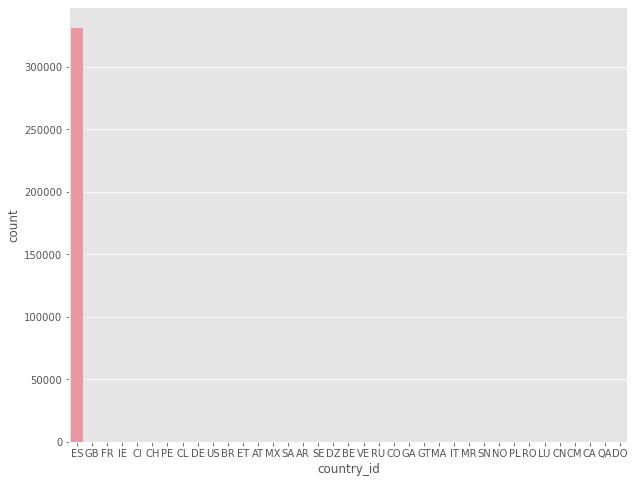

In [29]:
plt.figure(figsize = (10,8))
sns.countplot(data=clientes_activos,x='country_id')

### Región

In [30]:
clientes_activos['region_code'].value_counts().head()

28.00    56522
8.00     29670
46.00    21391
30.00    17981
41.00    16503
Name: region_code, dtype: int64

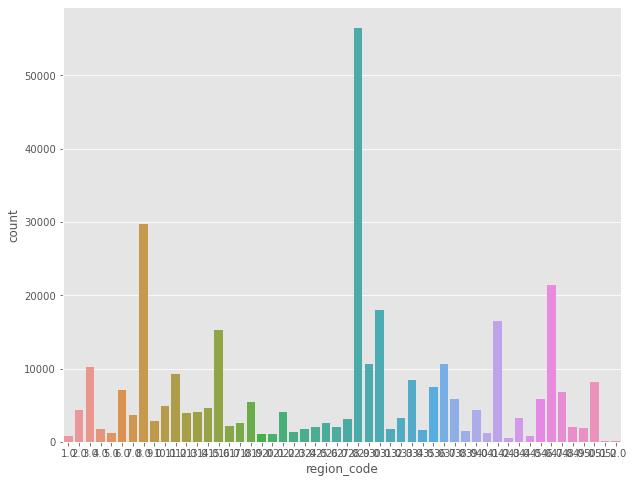

In [31]:
plt.figure(figsize = (10,8))
sns.countplot(data=clientes_activos,x='region_code')

### Género

In [32]:
clientes_activos['gender'].value_counts().head(20)

H    171855
V    159670
Name: gender, dtype: int64

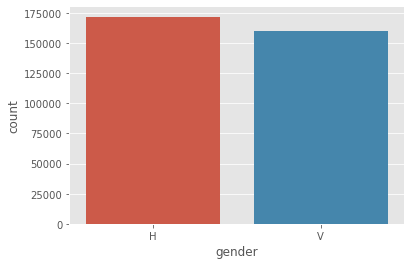

In [33]:
sns.countplot(data=clientes_activos,x='gender')

### Edad

In [34]:
clientes_activos['age'].value_counts().head(20)

23    39012
22    35502
21    33404
24    30975
25    18762
20    15424
26    14566
27    11651
28     9652
29     8299
30     7348
31     6710
32     6053
33     5960
34     5545
35     5349
36     4948
37     4782
38     4389
39     4305
Name: age, dtype: int64

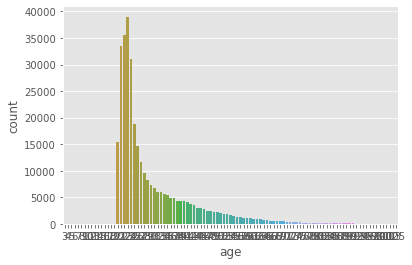

In [35]:
figsize = (12,5)
sns.countplot(data=clientes_activos,x='age')

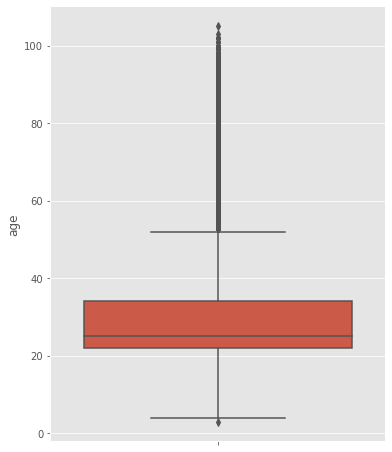

In [36]:
plt.figure(figsize = (6,8))
sns.boxplot(data=clientes_activos, y = 'age')

### Salario

In [37]:
clientes_activos['salary'].value_counts().head(20)

451,931.22    29
288,997.44    27
168,733.62    25
135,522.15    25
128,318.52    24
104,563.80    21
236,690.34    19
104,644.41    17
97,639.56     17
498,304.14    16
67,088.31     16
488,798.49    15
329,603.97    15
83,174.28     14
100,466.73    14
178,894.44    13
227,397.72    13
463,625.16    13
148,781.16    13
107,266.65    13
Name: salary, dtype: int64

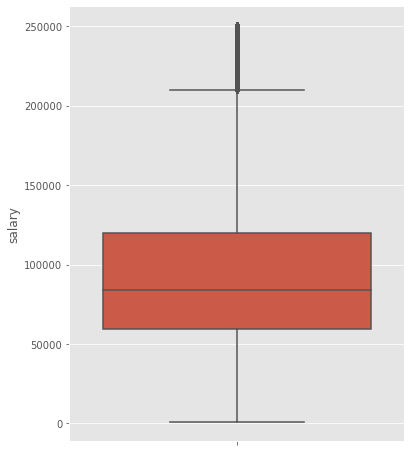

In [38]:
plt.figure(figsize = (6,8))
sns.boxplot(data=clientes_activos[clientes_activos['salary']<250000], y = 'salary')

## 2. EVOLUCIÓN DE PRODUCTOS Y CLIENTES

### 2.1 Evolución del total de clientes

#### Creamos un Dataframe con el dataset de productos ordenado por el Id de cliente y la fecha.

In [39]:
# Pasamos a formato fecha la variable del dataset de products:

products['pk_partition'] = pd.to_datetime(products['pk_partition'], format = '%Y-%m-%d')

In [40]:
products_sorted = products.sort_values(by=['pk_cid', 'pk_partition'])
products_sorted.head(20)

Unnamed: 0  pk_cid pk_partition  short_term_deposit  loans  mortgage  \
1479563     4078994   15891   2018-07-28                   0      0         0   
2168122     5319232   15891   2018-08-28                   0      0         0   
2962973     7451107   16063   2018-11-28                   0      0         0   
3628236     8617948   16063   2018-12-28                   0      0         0   
4028169     9401149   16063   2019-01-28                   0      0         0   
4480637    10426151   16063   2019-02-28                   0      0         0   
4876040    11171013   16063   2019-03-28                   0      0         0   
5134317    12220930   16063   2019-04-28                   0      0         0   
5523397    13026461   16063   2019-05-28                   0      0         0   
3628238     8618171   16203   2018-12-28                   0      0         0   
4028170     9401344   16203   2019-01-28                   0      0         0   
4480636    10425906   16203   2019-02-28                   0      0         0   
4876039    11170676   16203   2019-03-28                   0      0         0   
5134321    12221208   16203   2019-04-28                   0      0         0   
5523396    13026405   16203   2019-05-28                   0      0         0   
2171490     5705044   16502   2018-09-28                   0      0         0   
2943633     6909890   16502   2018-10-28                   0      0         0   
2962972     7450803   16502   2018-11-28                   0      0         0   
3628237     8618141   16502   2018-12-28                   0      0         0   
4028330     9401907   16502   2019-01-28                   0      0         0   

         funds  securities  long_term_deposit  em_account_pp  credit_card  \
1479563      0           0                  0              0            0   
2168122      0           0                  0              0            0   
2962973      0           0                  0              0            0   
3628236      0           0                  0              0            0   
4028169      0           0                  0              0            0   
4480637      0           0                  0              0            0   
4876040      0           0                  0              0            0   
5134317      0           0                  0              0            0   
5523397      0           0                  0              0            0   
3628238      0           0                  0              0            0   
4028170      0           0                  0              0            0   
4480636      0           0                  0              0            0   
4876039      0           0                  0              0            0   
5134321      0           0                  0              0            0   
5523396      0           0                  0              0            0   
2171490      0           0                  0              0            0   
2943633      0           0                  0              0            0   
2962972      0           0                  0              0            0   
3628237      0           0                  0              0            0   
4028330      0           0                  0              0            0   

         payroll  pension_plan  payroll_account  emc_account  debit_card  \
1479563     0.00          0.00                0            0           0   
2168122     0.00          0.00                0            0           0   
2962973     0.00          0.00                0            0           0   
3628236     0.00          0.00                0            0           0   
4028169     0.00          0.00                0            0           0   
4480637     0.00          0.00                0            0           0   
4876040     0.00          0.00                0            0           0   
5134317     0.00          0.00                0            0           0   
55233

In [41]:
# Creamos una función para sacar el total de clientes de cada producto por cada fecha.

def TotalSalesEvolution(df, column_name):
    sales= df.groupby("pk_partition").agg(product_name = (column_name, "sum"))
    sales.columns=[column_name]

    return sales

In [42]:
sales_df_short_term_deposit = TotalSalesEvolution(products_sorted, "short_term_deposit")
sales_df_loans = TotalSalesEvolution(products_sorted, "loans")
sales_df_mortgage = TotalSalesEvolution(products_sorted, "mortgage")
sales_df_funds = TotalSalesEvolution(products_sorted, "funds")
sales_df_securities = TotalSalesEvolution(products_sorted, "securities")
sales_df_long_term_deposit = TotalSalesEvolution(products_sorted, "long_term_deposit")
sales_df_em_account_pp = TotalSalesEvolution(products_sorted, "em_account_pp")
sales_df_credit_card = TotalSalesEvolution(products_sorted, "credit_card")
sales_df_payroll = TotalSalesEvolution(products_sorted, "payroll")
sales_df_pension_plan = TotalSalesEvolution(products_sorted, "pension_plan")
sales_df_payroll_account = TotalSalesEvolution(products_sorted, "payroll_account")
sales_df_emc_account = TotalSalesEvolution(products_sorted, "emc_account")
sales_df_debit_card = TotalSalesEvolution(products_sorted, "debit_card")
sales_df_em_account_p = TotalSalesEvolution(products_sorted, "em_account_p")
sales_df_em_acount = TotalSalesEvolution(products_sorted, "em_acount")

In [43]:
# Concatenamos todos los DF creados para generar un Dataframe de ventas (que especifica el total de clientes por producto en cada fecha).

total_sales_df = pd.concat([sales_df_short_term_deposit, sales_df_loans, sales_df_mortgage, sales_df_funds, sales_df_securities, sales_df_long_term_deposit, sales_df_em_account_pp, sales_df_credit_card, sales_df_payroll, sales_df_pension_plan, sales_df_payroll_account, sales_df_emc_account, sales_df_debit_card, sales_df_em_account_p, sales_df_em_acount], axis=1)

total_sales_df

short_term_deposit  loans  mortgage  funds  securities  \
pk_partition                                                           
2018-01-28                   883     19        15    786         932   
2018-02-28                  1343     19        15    872         965   
2018-03-28                  1664     23        17    969         965   
2018-04-28                  1740     24        17   1084         983   
2018-05-28                  1455     27        18   1145        1012   
2018-06-28                  1244     27        19   1159        1019   
2018-07-28                  1282     28        20   1172        1053   
2018-08-28                  1335     29        20   1219        1133   
2018-09-28                  1386     31        20   1237        1201   
2018-10-28                  1374     33        19   1249        1348   
2018-11-28                  1018     32        19   1282        1360   
2018-12-28                   528     30        19   1322        1420   
2019-01-28                   125     28        20   1330        1655   
2019-02-28                    11     29        20   1316        1747   
2019-03-28                     2     29        20   1322        1769   
2019-04-28                     2     30        23   1320        1782   
2019-05-28                     2     30        23   1315        1789   

              long_term_deposit  em_account_pp  credit_card   payroll  \
pk_partition                                                            
2018-01-28                 4884              0         3325  8,145.00   
2018-02-28                 4956              0         3282  8,889.00   
2018-03-28                 4965              0         3511  9,735.00   
2018-04-28                 5107              0         3725  9,905.00   
2018-05-28                 5356              0         3797  9,994.00   
2018-06-28                 5588              0         4002 10,946.00   
2018-07-28                 5796              0         4137 11,888.00   
2018-08-28                 5923              0         4206 11,383.00   
2018-09-28                 6158              0         4289 11,850.00   
2018-10-28                 6380              0         4385 12,454.00   
2018-11-28                 6447              0         4512 13,032.00   
2018-12-28                 6749              0         4536 14,452.00   
2019-01-28                 6659              0         4493 12,058.00   
2019-02-28                 6658              0         4542 14,378.00   
2019-03-28                 6537              0         4576 15,114.00   
2019-04-28                 6368              0         4747 15,231.00   
2019-05-28                 6129              0         4801 16,333.00   

              pension_plan  payroll_account  emc_account  debit_card  \
pk_partition                                                           
2018-01-28        8,835.00            13478        15320       24696   
2018-02-28        9,496.00            14246        15827       25448   
2018-03-28        9,882.00            14989        16428       27046   
2018-04-28       10,560.00            15825        16947       27764   
2018-05-28       10,148.00            16697        17569       27911   
2018-06-28       11,635.00            15540        17950       28828   
2018-07-28       12,779.00            16916        18185       29578   
2018-08-28       12,126.00            18118        18333       29205   
2018-09-28       12,624.00            18862        18618       31684   
2018-10-28       13,223.00            19945        18844       34372   
2018-11-28       13,818.00            21437        19494       35466   
2018-12-28       15,324.00            21359        20043       37430   
2019-01-28       12,538.00            22324        20921       37350   
2019-02-28       15,265.00            23264        21796       39399   
2019-03-28       15,976.00            24390        22480       41390   
2019-04-28       16,220.00       

In [44]:
# Creamos una variable con la suma de las ventas por mes. 

total_sales_df["total_sales_month"]=total_sales_df.sum(axis=1)
total_sales_df

short_term_deposit  loans  mortgage  funds  securities  \
pk_partition                                                           
2018-01-28                   883     19        15    786         932   
2018-02-28                  1343     19        15    872         965   
2018-03-28                  1664     23        17    969         965   
2018-04-28                  1740     24        17   1084         983   
2018-05-28                  1455     27        18   1145        1012   
2018-06-28                  1244     27        19   1159        1019   
2018-07-28                  1282     28        20   1172        1053   
2018-08-28                  1335     29        20   1219        1133   
2018-09-28                  1386     31        20   1237        1201   
2018-10-28                  1374     33        19   1249        1348   
2018-11-28                  1018     32        19   1282        1360   
2018-12-28                   528     30        19   1322        1420   
2019-01-28                   125     28        20   1330        1655   
2019-02-28                    11     29        20   1316        1747   
2019-03-28                     2     29        20   1322        1769   
2019-04-28                     2     30        23   1320        1782   
2019-05-28                     2     30        23   1315        1789   

              long_term_deposit  em_account_pp  credit_card   payroll  \
pk_partition                                                            
2018-01-28                 4884              0         3325  8,145.00   
2018-02-28                 4956              0         3282  8,889.00   
2018-03-28                 4965              0         3511  9,735.00   
2018-04-28                 5107              0         3725  9,905.00   
2018-05-28                 5356              0         3797  9,994.00   
2018-06-28                 5588              0         4002 10,946.00   
2018-07-28                 5796              0         4137 11,888.00   
2018-08-28                 5923              0         4206 11,383.00   
2018-09-28                 6158              0         4289 11,850.00   
2018-10-28                 6380              0         4385 12,454.00   
2018-11-28                 6447              0         4512 13,032.00   
2018-12-28                 6749              0         4536 14,452.00   
2019-01-28                 6659              0         4493 12,058.00   
2019-02-28                 6658              0         4542 14,378.00   
2019-03-28                 6537              0         4576 15,114.00   
2019-04-28                 6368              0         4747 15,231.00   
2019-05-28                 6129              0         4801 16,333.00   

              pension_plan  payroll_account  emc_account  debit_card  \
pk_partition                                                           
2018-01-28        8,835.00            13478        15320       24696   
2018-02-28        9,496.00            14246        15827       25448   
2018-03-28        9,882.00            14989        16428       27046   
2018-04-28       10,560.00            15825        16947       27764   
2018-05-28       10,148.00            16697        17569       27911   
2018-06-28       11,635.00            15540        17950       28828   
2018-07-28       12,779.00            16916        18185       29578   
2018-08-28       12,126.00            18118        18333       29205   
2018-09-28       12,624.00            18862        18618       31684   
2018-10-28       13,223.00            19945        18844       34372   
2018-11-28       13,818.00            21437        19494       35466   
2018-12-28       15,324.00            21359        20043       37430   
2019-01-28       12,538.00            22324        20921       37350   
2019-02-28       15,265.00            23264        21796       39399   
2019-03-28       15,976.00            24390        22480       41390   
2019-04-28       16,220.00       

[Text(0, 0.5, 'Total de clientes'), Text(0.5, 0, 'Fecha')]

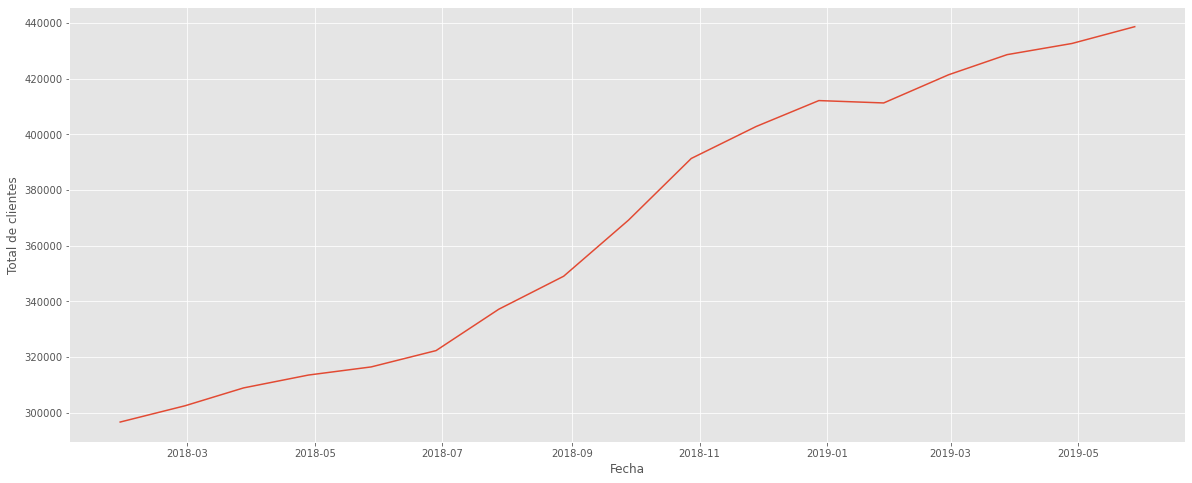

In [45]:
# Visualización de total de evolución del total de clientes al mes:

plt.figure(figsize=(20,8))
graph=sns.lineplot(data=total_sales_df["total_sales_month"])
graph.set(xlabel='Fecha', ylabel='Total de clientes')

### 2.2 Evolución del total de clientes por segmento

#### Calculamos el total de clientes por segmento al mes

In [46]:
# Extraemos los valores de Segment para cada producto y fecha.

sales_by_segment= full_df.groupby("pk_partition")['segment'].value_counts(dropna=False).rename("total_by_segment").reset_index()
sales_by_segment.set_index("pk_partition", inplace=True)
sales_by_segment

segment  total_by_segment
pk_partition                                      
2018-01-28    03 - UNIVERSITARIO            169792
2018-01-28     02 - PARTICULARES             65722
2018-01-28              01 - TOP              3951
2018-01-28                   NaN                28
2018-02-28    03 - UNIVERSITARIO            170064
2018-02-28     02 - PARTICULARES             68211
2018-02-28              01 - TOP              4220
2018-02-28                   NaN                26
2018-03-28    03 - UNIVERSITARIO            170261
2018-03-28     02 - PARTICULARES             70447
2018-03-28              01 - TOP              4527
2018-03-28                   NaN                23
2018-04-28    03 - UNIVERSITARIO            170396
2018-04-28     02 - PARTICULARES             72242
2018-04-28              01 - TOP              4816
2018-04-28                   NaN                 9
2018-05-28    03 - UNIVERSITARIO            170551
2018-05-28     02 - PARTICULARES             74236
2018-05-28              01 - TOP              5131
2018-05-28                   NaN                 8
2018-06-28    03 - UNIVERSITARIO            170670
2018-06-28     02 - PARTICULARES             76111
2018-06-28              01 - TOP              5323
2018-07-28    03 - UNIVERSITARIO            208935
2018-07-28     02 - PARTICULARES            108178
2018-07-28                   NaN             16850
2018-07-28              01 - TOP              5376
2018-08-28    03 - UNIVERSITARIO            220175
2018-08-28     02 - PARTICULARES            112669
2018-08-28                   NaN             14507
2018-08-28              01 - TOP              5571
2018-09-28    03 - UNIVERSITARIO            229676
2018-09-28     02 - PARTICULARES            116549
2018-09-28                   NaN             23338
2018-09-28              01 - TOP              5760
2018-10-28    03 - UNIVERSITARIO            247336
2018-10-28     02 - PARTICULARES            120713
2018-10-28                   NaN             28183
2018-10-28              01 - TOP              6068
2018-11-28    03 - UNIVERSITARIO            270162
2018-11-28     02 - PARTICULARES            124282
2018-11-28                   NaN             15591
2018-11-28              01 - TOP              6352
2018-12-28    03 - UNIVERSITARIO            280926
2018-12-28     02 - PARTICULARES            127607
2018-12-28                   NaN              7443
2018-12-28              01 - TOP              6505
2019-01-28    03 - UNIVERSITARIO            284151
2019-01-28     02 - PARTICULARES            129073
2019-01-28                   NaN              7040
2019-01-28              01 - TOP              6611
2019-02-28    03 - UNIVERSITARIO            284182
2019-02-28     02 - PARTICULARES            134546
2019-02-28              01 - TOP              6708
2019-02-28                   NaN              6291
2019-03-28    03 - UNIVERSITARIO            284274
2019-03-28     02 - PARTICULARES            139679
2019-03-28              01 - TOP              6863
2019-03-28                   NaN              5367
2019-04-28    03 - UNIVERSITARIO            284379
2019-04-28     02 - PARTICULARES            143646
2019-04-28              01 - TOP              6978
2019-04-28                   NaN              4624
2019-05-28    03 - UNIVERSITARIO            284236
2019-05-28     02 - PARTICULARES            146964
2019-05-28              01 - TOP              7179
2019-05-28                   NaN              4616

[Text(0, 0.5, 'Clientes por segmento'), Text(0.5, 0, 'Fecha')]

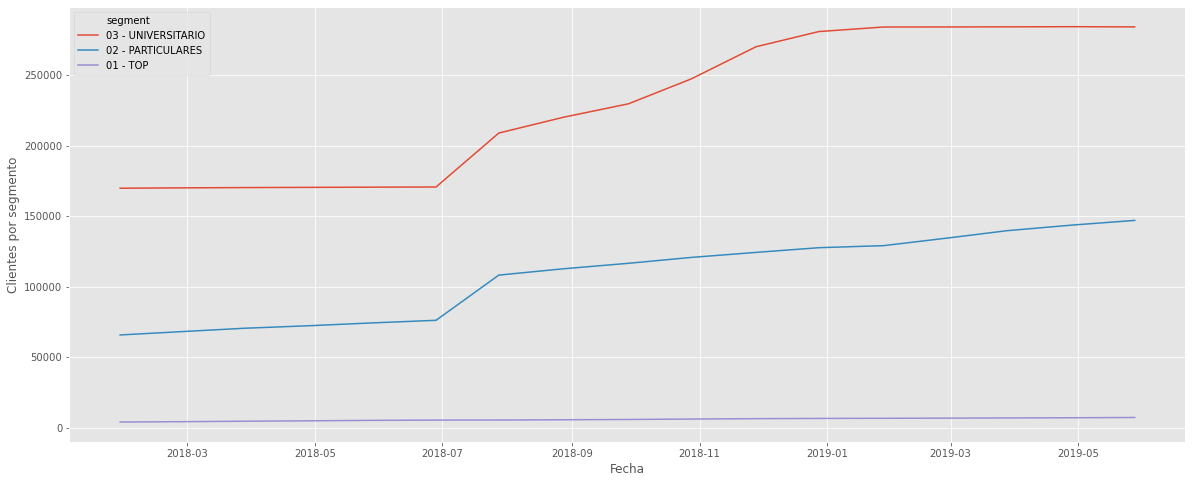

In [47]:
plt.figure(figsize=(20,8))
graph=sns.lineplot(data=sales_by_segment, x=sales_by_segment.index, y="total_by_segment", hue="segment")
graph.set(xlabel='Fecha', ylabel='Clientes por segmento')

### 2.3 Evolución de altas y bajas de clientes en cada producto

In [48]:
# Creamos una función que nos permita calcular la variación (pérdida y ganancia) de clientes en cada producto y su gráfica:

def VariacionClientes(column_name, df):
    name1 = column_name + "_previous_month"
    name2 = column_name + "_dif"
    df[name1] = df.groupby('pk_cid')[column_name].shift(1)
    df[name2] = df[column_name] - df[name1]
    customer_loss = df[df[name2] == -1].pivot_table(index='pk_partition', values=name2, aggfunc=[len])
    customer_gain = df[df[name2] == 1].pivot_table(index='pk_partition', values=name2, aggfunc=[len])
    customer=pd.merge(customer_loss, customer_gain, on="pk_partition")
    customer.columns=["Bajas", "Altas"]

    plt.figure(figsize=(20,8))
    graph=sns.lineplot(data=customer)
    graph.set(xlabel='Fecha', ylabel='Clientes')

    return customer

Bajas  Altas
pk_partition              
2018-02-28   205.00 264.00
2018-03-28   331.00 398.00
2018-04-28   343.00 228.00
2018-05-28   668.00 209.00
2018-06-28   654.00 246.00
2018-07-28   413.00 226.00
2018-08-28   381.00 267.00
2018-09-28   446.00 329.00
2018-10-28   424.00 300.00
2018-11-28   452.00  92.00
2018-12-28   496.00   6.00

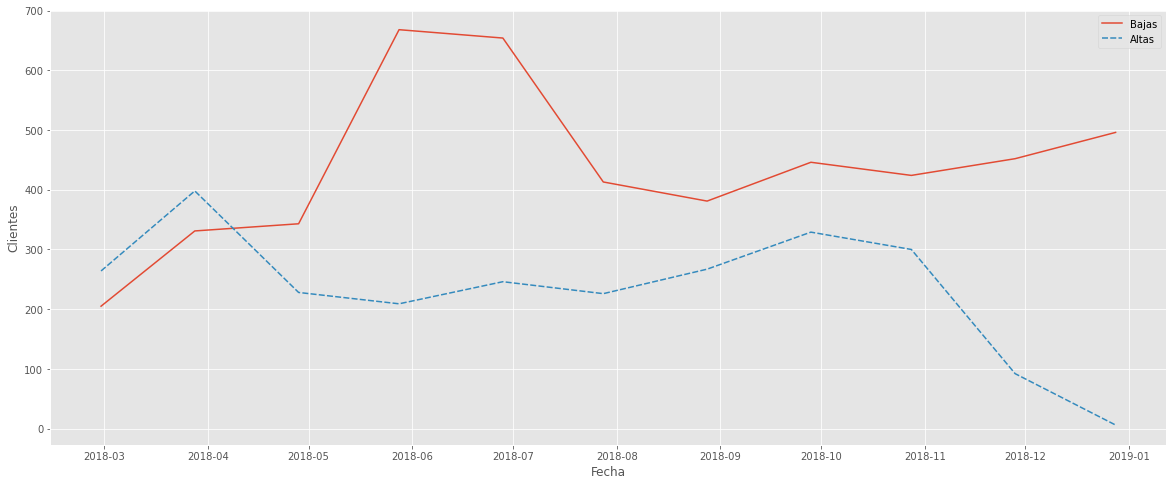

In [49]:
VariacionClientes("short_term_deposit", products_sorted)

Bajas  Altas
pk_partition              
2018-04-28     2.00   2.00
2018-08-28     1.00   2.00
2018-12-28     3.00   1.00
2019-01-28     3.00   1.00
2019-03-28     3.00   2.00
2019-04-28     1.00   2.00

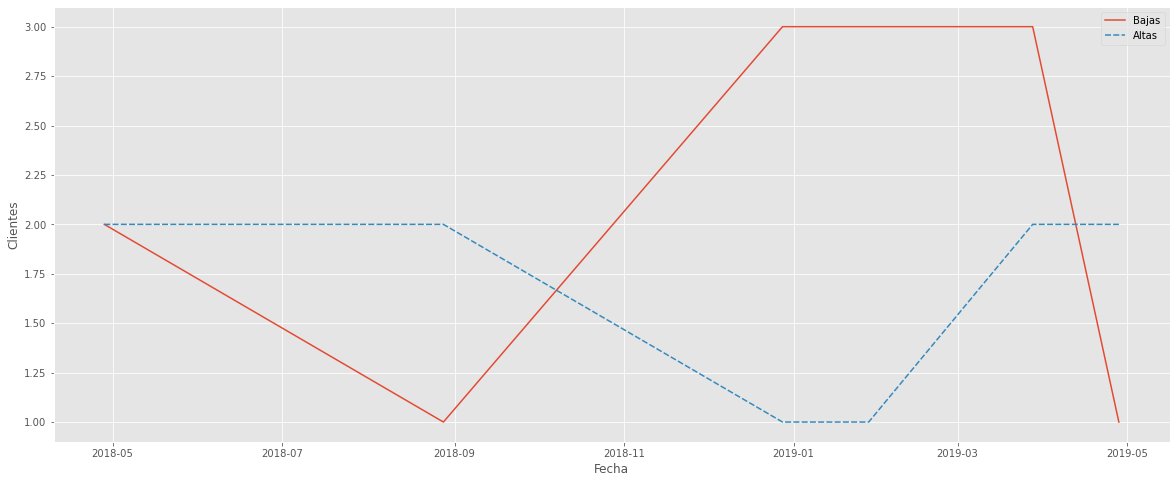

In [50]:
VariacionClientes("loans", products_sorted)

Bajas  Altas
pk_partition              
2018-04-28     1.00   1.00

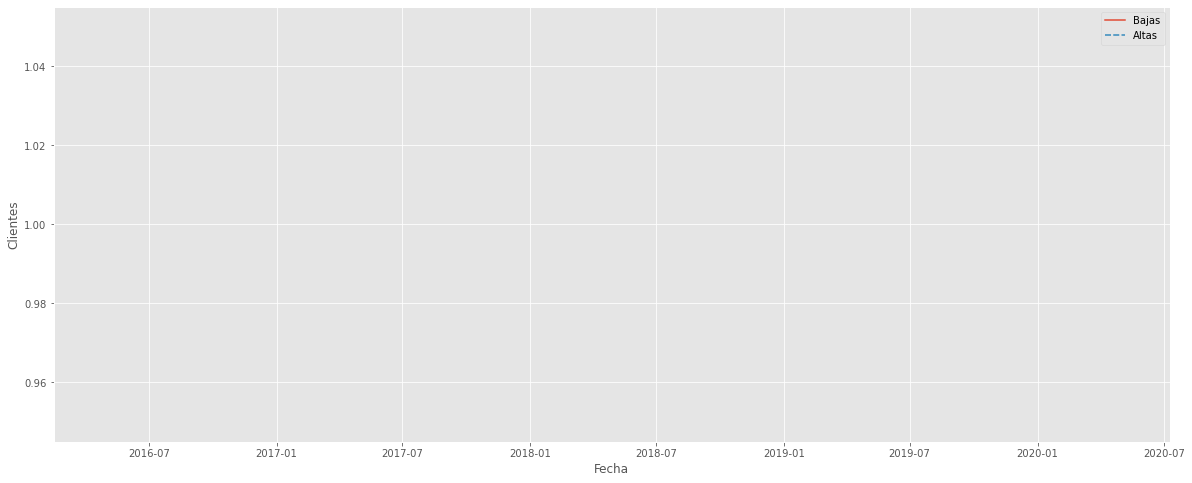

In [51]:
VariacionClientes("mortgage", products_sorted)

Bajas  Altas
pk_partition              
2018-02-28    11.00  96.00
2018-03-28    22.00 115.00
2018-04-28    12.00 123.00
2018-05-28    22.00  77.00
2018-06-28    39.00  52.00
2018-07-28    41.00  53.00
2018-08-28    16.00  63.00
2018-09-28    20.00  36.00
2018-10-28    28.00  38.00
2018-11-28    19.00  50.00
2018-12-28    20.00  59.00
2019-01-28    28.00  34.00
2019-02-28    39.00  25.00
2019-03-28    22.00  28.00
2019-04-28    27.00  24.00
2019-05-28    23.00  18.00

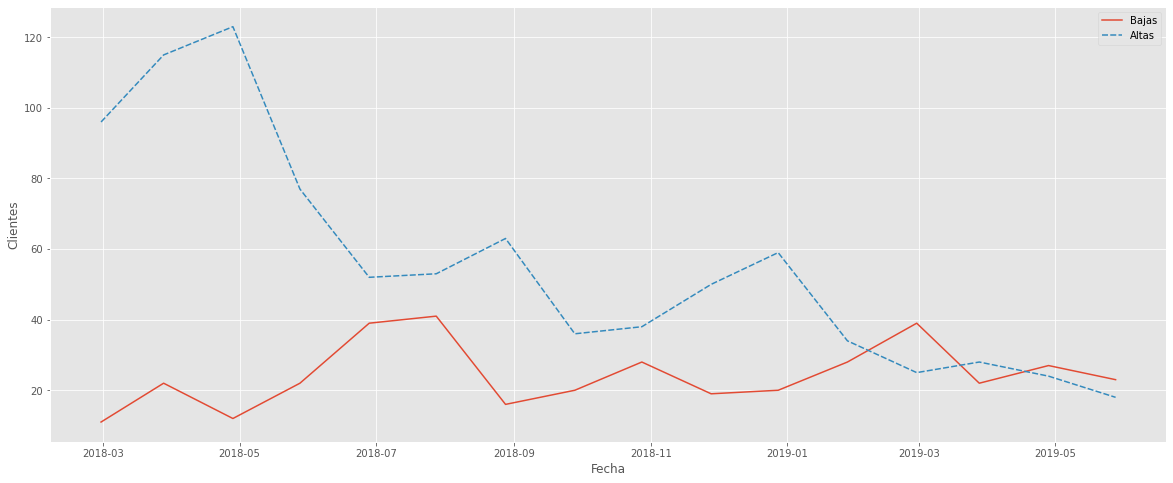

In [52]:
VariacionClientes("funds", products_sorted)

Bajas  Altas
pk_partition              
2018-02-28    35.00  65.00
2018-03-28    47.00  45.00
2018-04-28    27.00  42.00
2018-05-28    18.00  41.00
2018-06-28    35.00  35.00
2018-07-28    25.00  53.00
2018-08-28    21.00  99.00
2018-09-28     9.00  74.00
2018-10-28    32.00 176.00
2018-11-28    27.00  37.00
2018-12-28    26.00  81.00
2019-01-28    19.00 250.00
2019-02-28    28.00 115.00
2019-03-28    43.00  63.00
2019-04-28    31.00  41.00
2019-05-28    32.00  39.00

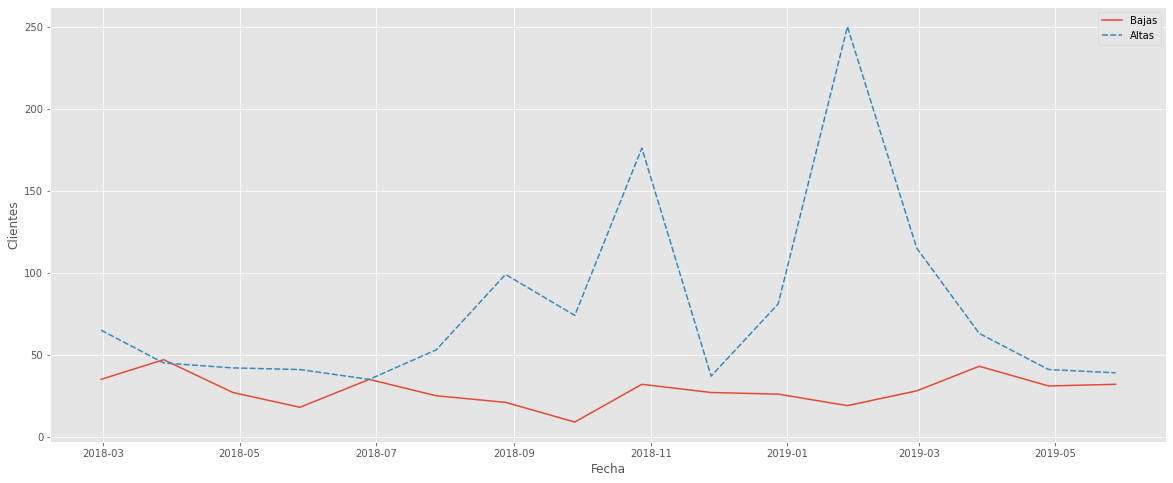

In [53]:
VariacionClientes("securities", products_sorted)

Bajas  Altas
pk_partition              
2018-02-28   153.00 199.00
2018-03-28   252.00 215.00
2018-04-28   107.00 203.00
2018-05-28   106.00 297.00
2018-06-28   155.00 319.00
2018-07-28   242.00 377.00
2018-08-28   218.00 311.00
2018-09-28   262.00 444.00
2018-10-28   284.00 441.00
2018-11-28   299.00 312.00
2018-12-28   162.00 398.00
2019-01-28   284.00 174.00
2019-02-28   220.00 196.00
2019-03-28   197.00  73.00
2019-04-28   196.00  26.00
2019-05-28   251.00  12.00

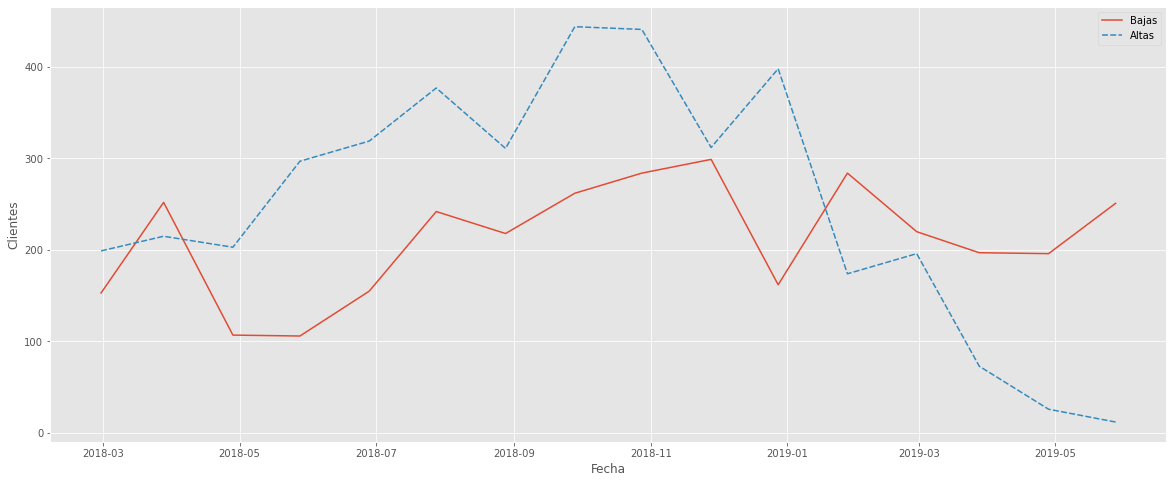

In [54]:
VariacionClientes("long_term_deposit", products_sorted)

In [55]:
"""
VariacionClientes("em_account_pp", products_sorted)
"""

'\nVariacionClientes("em_account_pp", products_sorted)\n'

Bajas  Altas
pk_partition              
2018-02-28   553.00 481.00
2018-03-28   506.00 704.00
2018-04-28   410.00 638.00
2018-05-28   558.00 607.00
2018-06-28   516.00 729.00
2018-07-28   672.00 743.00
2018-08-28   625.00 692.00
2018-09-28   666.00 746.00
2018-10-28   647.00 742.00
2018-11-28   585.00 710.00
2018-12-28   640.00 663.00
2019-01-28   696.00 651.00
2019-02-28   659.00 707.00
2019-03-28   707.00 735.00
2019-04-28   542.00 706.00
2019-05-28   707.00 758.00

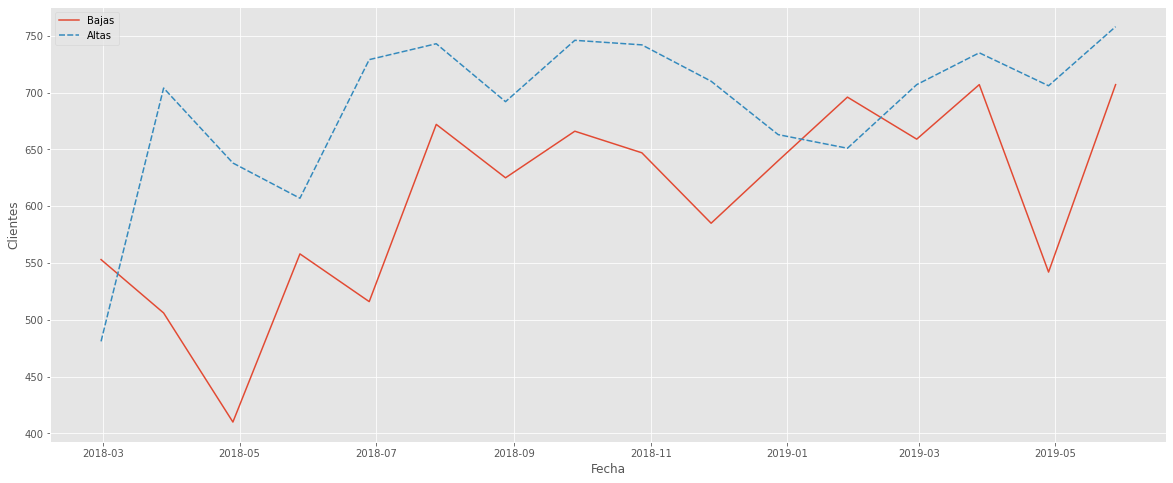

In [56]:
VariacionClientes("credit_card", products_sorted)

Bajas    Altas
pk_partition                  
2018-02-28   1,217.00 1,913.00
2018-03-28     862.00 1,638.00
2018-04-28   1,172.00 1,289.00
2018-05-28   1,502.00 1,549.00
2018-06-28   1,198.00 2,099.00
2018-07-28   1,397.00 2,214.00
2018-08-28   2,142.00 1,605.00
2018-09-28   1,679.00 2,104.00
2018-10-28   1,776.00 2,330.00
2018-11-28   1,749.00 2,271.00
2018-12-28   1,166.00 2,530.00
2019-01-28   3,846.00 1,410.00
2019-02-28   1,713.00 3,995.00
2019-03-28   1,647.00 2,358.00
2019-04-28   2,065.00 2,139.00
2019-05-28   1,660.00 2,736.00

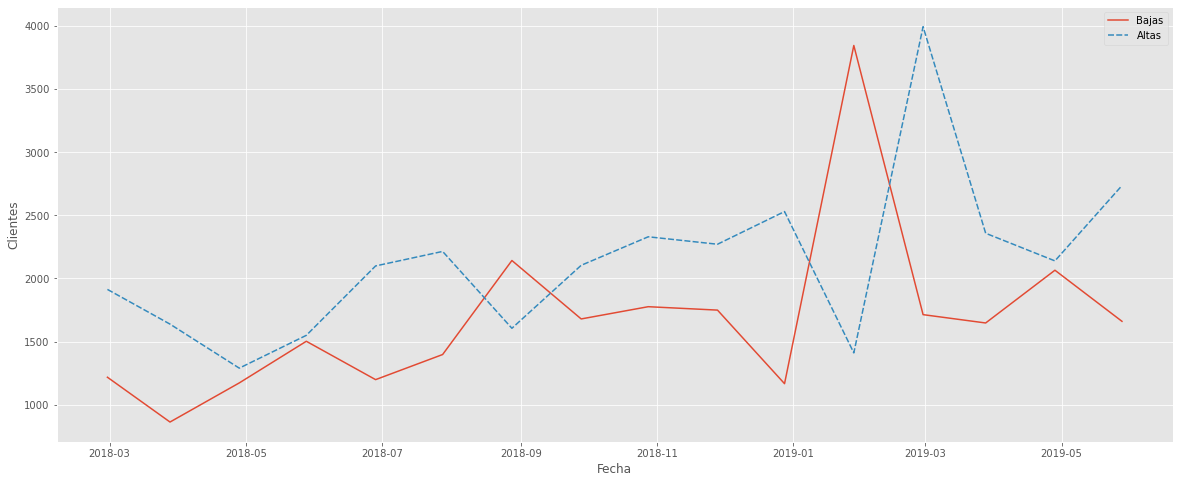

In [57]:
VariacionClientes("payroll", products_sorted)

Bajas    Altas
pk_partition                  
2018-02-28   1,340.00 1,952.00
2018-03-28   1,336.00 1,653.00
2018-04-28   1,175.00 1,795.00
2018-05-28   2,014.00 1,560.00
2018-06-28   1,198.00 2,631.00
2018-07-28   1,393.00 2,410.00
2018-08-28   2,313.00 1,628.00
2018-09-28   1,692.00 2,146.00
2018-10-28   1,807.00 2,355.00
2018-11-28   1,769.00 2,309.00
2018-12-28   1,173.00 2,623.00
2019-01-28   4,487.00 1,660.00
2019-02-28   1,960.00 4,647.00
2019-03-28   1,739.00 2,425.00
2019-04-28   2,073.00 2,274.00
2019-05-28   1,684.00 2,791.00

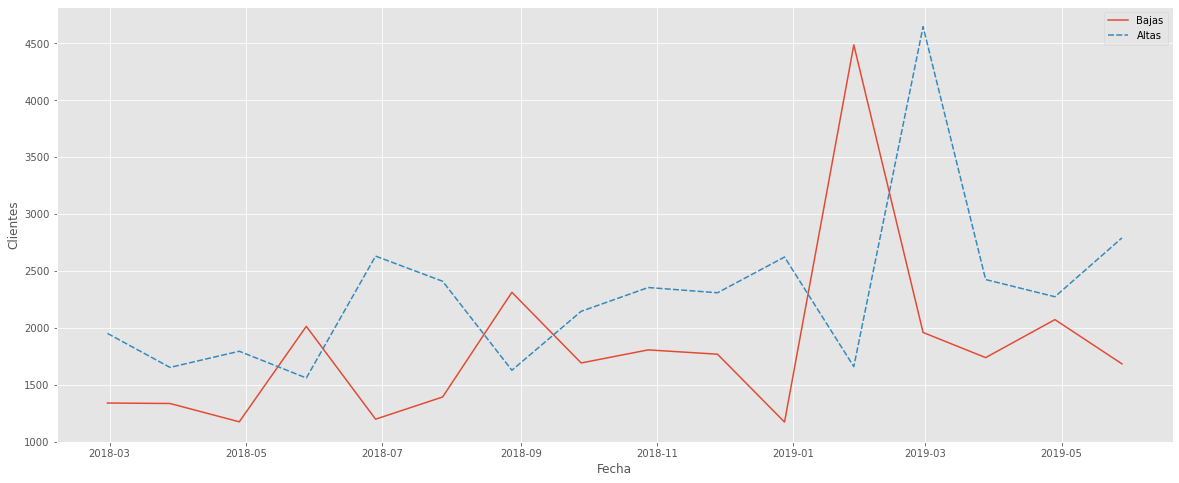

In [58]:
VariacionClientes("pension_plan", products_sorted)

Bajas    Altas
pk_partition                  
2018-02-28     206.00   915.00
2018-03-28     272.00   963.00
2018-04-28     261.00 1,035.00
2018-05-28     254.00 1,062.00
2018-06-28   2,271.00 1,063.00
2018-07-28     278.00 1,577.00
2018-08-28     354.00 1,520.00
2018-09-28     331.00 1,040.00
2018-10-28     315.00 1,357.00
2018-11-28     368.00 1,769.00
2018-12-28   2,372.00 2,142.00
2019-01-28     400.00 1,311.00
2019-02-28     439.00 1,333.00
2019-03-28     390.00 1,486.00
2019-04-28     363.00 1,435.00
2019-05-28     501.00 1,511.00

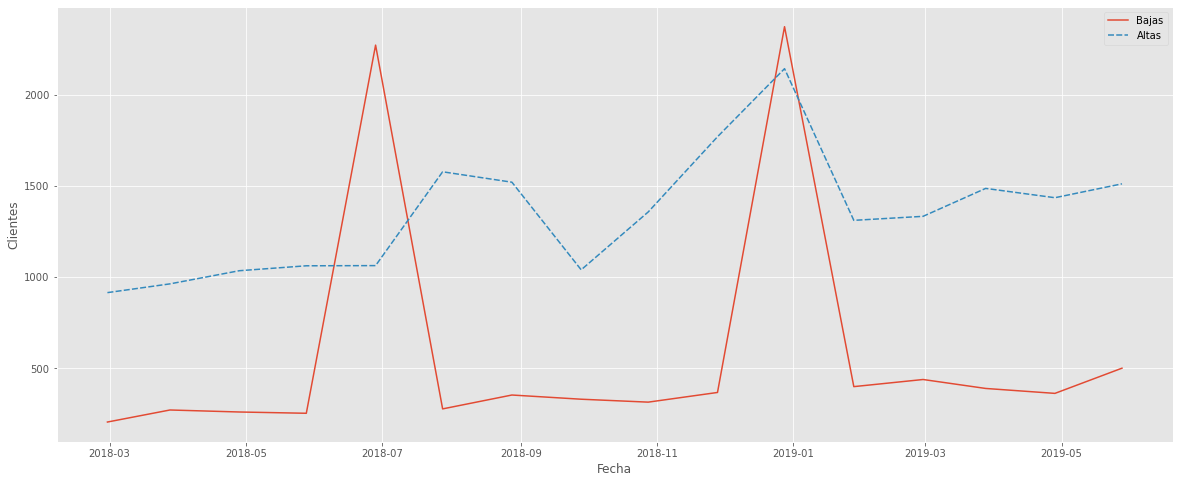

In [59]:
VariacionClientes("payroll_account", products_sorted)

Bajas    Altas
pk_partition                
2018-02-28   300.00   793.00
2018-03-28   314.00   902.00
2018-04-28   321.00   825.00
2018-05-28   243.00   853.00
2018-06-28   293.00   679.00
2018-07-28   328.00   540.00
2018-08-28   300.00   442.00
2018-09-28   301.00   577.00
2018-10-28   342.00   558.00
2018-11-28   293.00   936.00
2018-12-28   352.00   892.00
2019-01-28   298.00 1,169.00
2019-02-28   356.00 1,222.00
2019-03-28   347.00 1,025.00
2019-04-28   307.00 1,267.00
2019-05-28   306.00 1,593.00

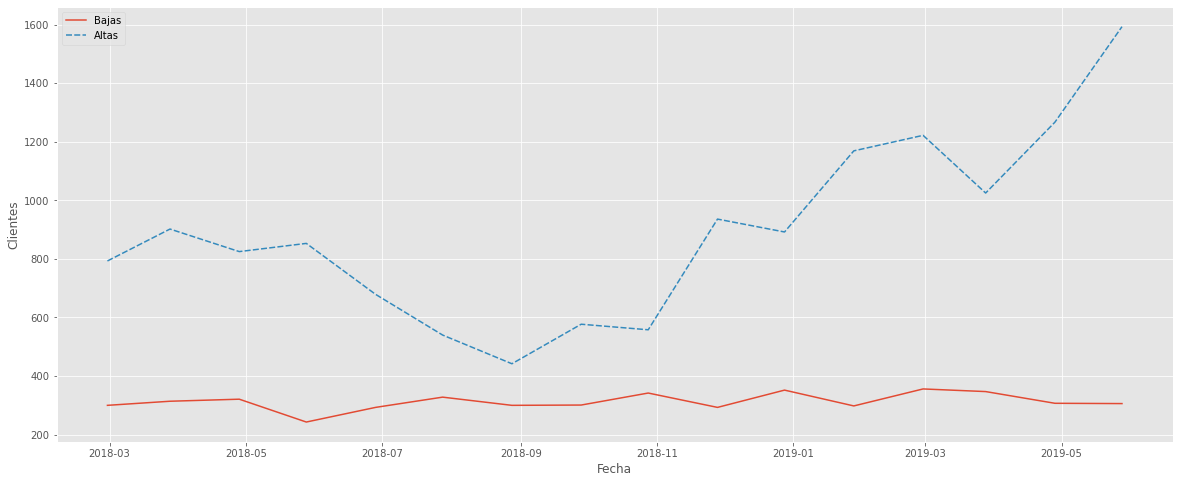

In [60]:
VariacionClientes("emc_account", products_sorted)

Bajas    Altas
pk_partition                  
2018-02-28   2,913.00 3,617.00
2018-03-28   2,432.00 3,941.00
2018-04-28   2,742.00 3,407.00
2018-05-28   3,013.00 3,111.00
2018-06-28   2,754.00 3,614.00
2018-07-28   3,373.00 3,865.00
2018-08-28   4,010.00 3,593.00
2018-09-28   2,792.00 5,199.00
2018-10-28   3,589.00 6,230.00
2018-11-28   4,141.00 5,184.00
2018-12-28   3,168.00 5,083.00
2019-01-28   4,744.00 4,621.00
2019-02-28   4,064.00 6,055.00
2019-03-28   3,557.00 5,499.00
2019-04-28   4,229.00 4,949.00
2019-05-28   4,003.00 5,085.00

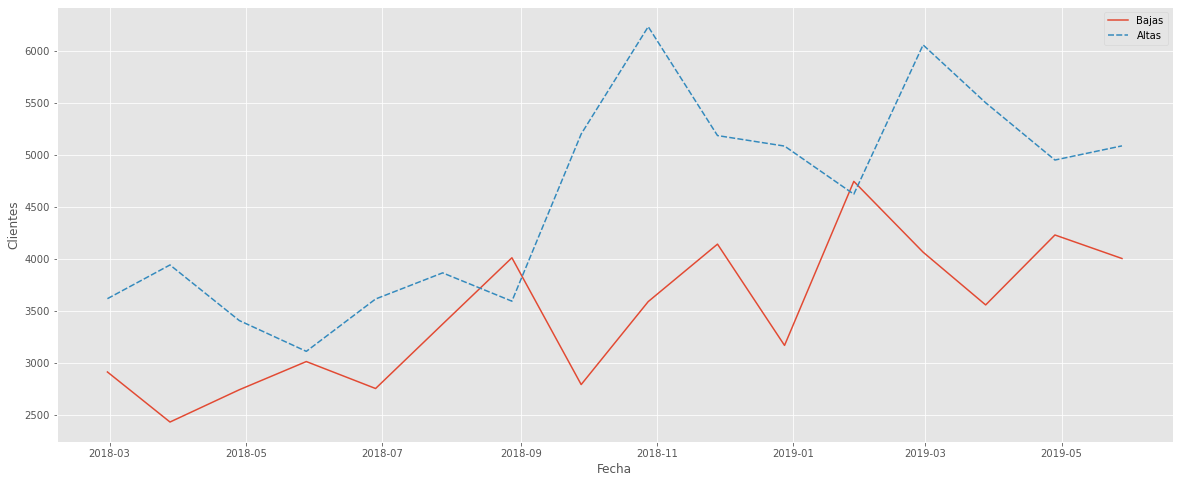

In [61]:
VariacionClientes("debit_card", products_sorted)

In [62]:
"""
VariacionClientes("em_account_p", products_sorted)
"""

'\nVariacionClientes("em_account_p", products_sorted)\n'

Bajas    Altas
pk_partition                  
2018-02-28   2,351.00   870.00
2018-03-28   2,436.00 1,017.00
2018-04-28   2,433.00 1,003.00
2018-05-28   2,290.00 1,074.00
2018-06-28   2,466.00 3,068.00
2018-07-28   3,386.00 1,202.00
2018-08-28   3,222.00 4,178.00
2018-09-28   3,158.00 2,687.00
2018-10-28   3,454.00 4,079.00
2018-11-28   4,137.00 3,165.00
2018-12-28   4,019.00 5,177.00
2019-01-28   3,419.00 2,712.00
2019-02-28   3,769.00 2,560.00
2019-03-28   3,472.00 3,100.00
2019-04-28   3,423.00 2,581.00
2019-05-28   3,484.00 2,466.00

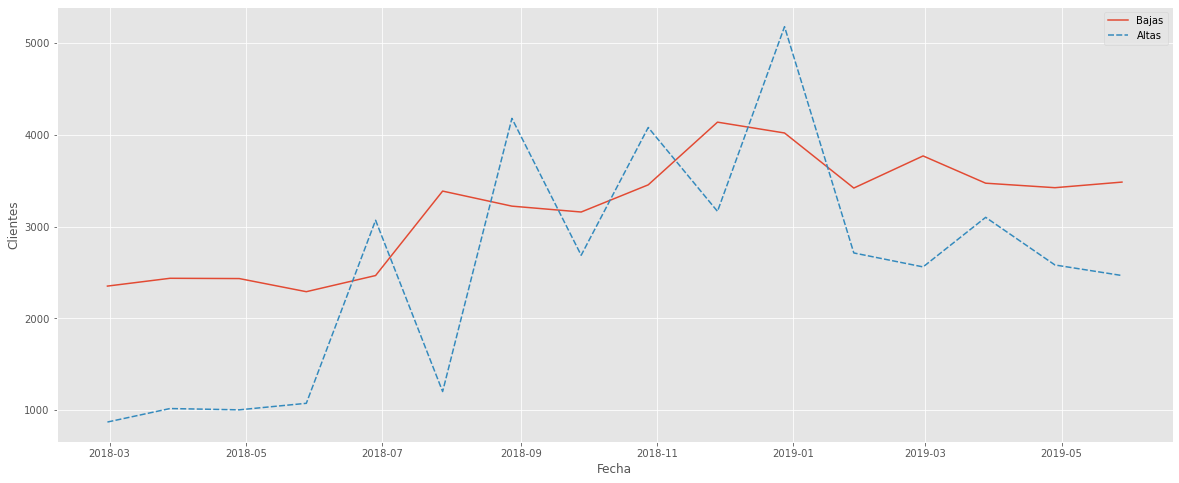

In [63]:
VariacionClientes("em_acount", products_sorted)

### 2.4 Total de altas y bajas por mes

In [64]:
# Definimos una función parecida a la anterior, pero sin las gráficas

def VariacionClientes2(column_name, df):
    name1 = column_name + "_previous_month"
    name2 = column_name + "_dif"
    df[name1] = df.groupby('pk_cid')[column_name].shift(1)
    df[name2] = df[column_name] - df[name1]
    customer_loss = df[df[name2] == -1].pivot_table(index='pk_partition', values=name2, aggfunc=[len])
    customer_gain = df[df[name2] == 1].pivot_table(index='pk_partition', values=name2, aggfunc=[len])
    customer=pd.merge(customer_loss, customer_gain, on="pk_partition")
    customer.columns=["Bajas", "Altas"]

    return customer

In [65]:
# Concatenamos todos los DF anteriores y calculamos un total por mes

dif_short_term_deposit = VariacionClientes2("short_term_deposit", products_sorted)
dif_loans = VariacionClientes2("loans", products_sorted)
dif_mortgage = VariacionClientes2("mortgage", products_sorted)
dif_funds = VariacionClientes2("funds", products_sorted)
dif_securities = VariacionClientes2("securities", products_sorted)
dif_long_term_deposit = VariacionClientes2("long_term_deposit", products_sorted)
dif_credit_card = VariacionClientes2("credit_card", products_sorted)
dif_payroll = VariacionClientes2("payroll", products_sorted)
dif_pension_plan = VariacionClientes2("pension_plan", products_sorted)
dif_payroll_account = VariacionClientes2("payroll_account", products_sorted)
dif_emc_account = VariacionClientes2("emc_account", products_sorted)
dif_debit_card = VariacionClientes2("debit_card", products_sorted)
dif_em_acount = VariacionClientes2("em_acount", products_sorted)

In [66]:
total_dif = pd.concat([dif_short_term_deposit, dif_loans, dif_mortgage, dif_funds, dif_securities, dif_long_term_deposit, dif_credit_card, dif_payroll, dif_pension_plan, dif_payroll_account, dif_emc_account, dif_debit_card, dif_em_acount], axis=1)

              total_month_bajas  total_month_altas
pk_partition                                      
2018-02-28             9,284.00          11,165.00
2018-03-28             8,810.00          11,591.00
2018-04-28             9,006.00          10,591.00
2018-05-28            10,688.00          10,440.00
2018-06-28            11,579.00          14,535.00
2018-07-28            11,548.00          13,260.00
2018-08-28            13,603.00          14,400.00
2018-09-28            11,356.00          15,382.00
2018-10-28            12,698.00          18,606.00
2018-11-28            13,839.00          16,835.00
2018-12-28            13,597.00          19,655.00
2019-01-28            18,224.00          13,993.00
2019-02-28            13,247.00          20,855.00
2019-03-28            12,124.00          16,794.00
2019-04-28            13,257.00          15,444.00
2019-05-28            12,651.00          17,009.00


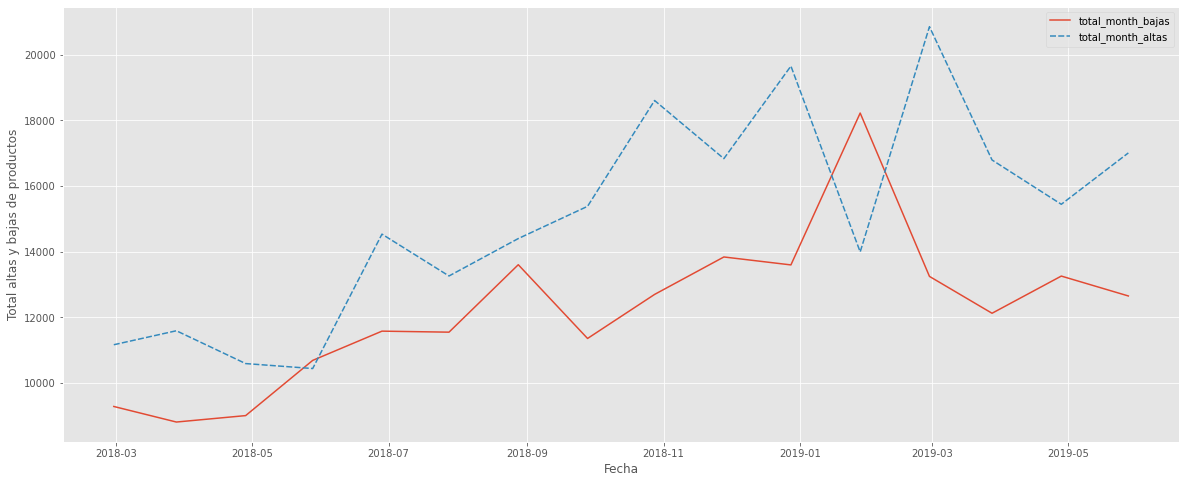

In [67]:
total_dif["total_month_bajas"]=total_dif["Bajas"].sum(axis=1)
total_dif["total_month_altas"]=total_dif["Altas"].sum(axis=1)

total_var_month=pd.merge(total_dif["total_month_bajas"], total_dif["total_month_altas"], on="pk_partition")
print(total_var_month)

# Gráfica
plt.figure(figsize=(20,8))
graph_var=sns.lineplot(data=total_var_month)
graph_var.set(xlabel='Fecha', ylabel='Total altas y bajas de productos')
plt.show()

### 2.5 Duración media de contratación de cada producto

In [68]:
def FechasAltaBaja (product_column, df):
    sus_date = df[df[product_column]==1].pivot_table(index='pk_cid', values="pk_partition", aggfunc=[min])
    unsus_date = df[df[product_column]==1].pivot_table(index='pk_cid', values="pk_partition", aggfunc=[max])

    dates_sus_unsus=pd.merge(sus_date, unsus_date, on="pk_cid")
    dates_sus_unsus.columns=["suscription_date", "unsuscription_date"]
    dates_sus_unsus["unsuscription_date"] = dates_sus_unsus["unsuscription_date"] + datetime.timedelta(days=30) 

    dates_sus_unsus["contract_duration"] = dates_sus_unsus["unsuscription_date"] - dates_sus_unsus["suscription_date"] 
    
# Añadimos 30 días más al ser la baja al mes siguiente y para evitar que los contratos de un mes tengan 0 días.

    return dates_sus_unsus

In [69]:
dates_short_term_deposit = FechasAltaBaja("short_term_deposit", products_sorted)
dates_loans = FechasAltaBaja("loans", products_sorted)
dates_mortgage = FechasAltaBaja("mortgage", products_sorted)
dates_funds = FechasAltaBaja("funds", products_sorted)
dates_securities = FechasAltaBaja("securities", products_sorted)
dates_long_term_deposit = FechasAltaBaja("long_term_deposit", products_sorted)
dates_credit_card = FechasAltaBaja("credit_card", products_sorted)
dates_payroll = FechasAltaBaja("payroll", products_sorted)
dates_pension_plan = FechasAltaBaja("pension_plan", products_sorted)
dates_payroll_account = FechasAltaBaja("payroll_account", products_sorted)
dates_emc_account = FechasAltaBaja("emc_account", products_sorted)
dates_debit_card = FechasAltaBaja("debit_card", products_sorted)
dates_em_acount = FechasAltaBaja("em_acount", products_sorted)

In [70]:
dates_debit_card.head()

suscription_date unsuscription_date contract_duration
pk_cid                                                      
17457        2018-09-28         2019-06-27          272 days
17970        2018-01-28         2019-06-27          515 days
20333        2018-01-28         2019-06-27          515 days
21719        2018-05-28         2019-06-27          395 days
22212        2019-04-28         2019-05-28           30 days

In [71]:
mean_duration_df = pd.DataFrame(index=["MeanDuration"])

In [72]:
def MeanDuration(column, df):
    mean_duration_df[column] = df["contract_duration"].mean(axis=0).days

    return mean_duration_df

In [73]:
MeanDuration("short_term_deposit", dates_short_term_deposit)
MeanDuration("loans", dates_loans)
MeanDuration("mortgage", dates_mortgage)
MeanDuration("funds", dates_funds)
MeanDuration("securities", dates_securities)
MeanDuration("long_term_deposit", dates_long_term_deposit)
MeanDuration("credit_card", dates_credit_card)
MeanDuration("payroll", dates_payroll)
MeanDuration("pension_plan", dates_pension_plan)
MeanDuration("payroll_account", dates_payroll_account)
MeanDuration("emc_account", dates_emc_account)
MeanDuration("debit_card", dates_debit_card)
MeanDuration("em_acount", dates_em_acount)

short_term_deposit  loans  mortgage  funds  securities  \
MeanDuration                  87    322       392    367         326   

              long_term_deposit  credit_card  payroll  pension_plan  \
MeanDuration                338          302      266           270   

              payroll_account  emc_account  debit_card  em_acount  
MeanDuration              324          362         304        402

In [74]:
mean_duration_df_T = mean_duration_df.T

                    MeanDuration
short_term_deposit            87
loans                        322
mortgage                     392
funds                        367
securities                   326
long_term_deposit            338
credit_card                  302
payroll                      266
pension_plan                 270
payroll_account              324
emc_account                  362
debit_card                   304
em_acount                    402


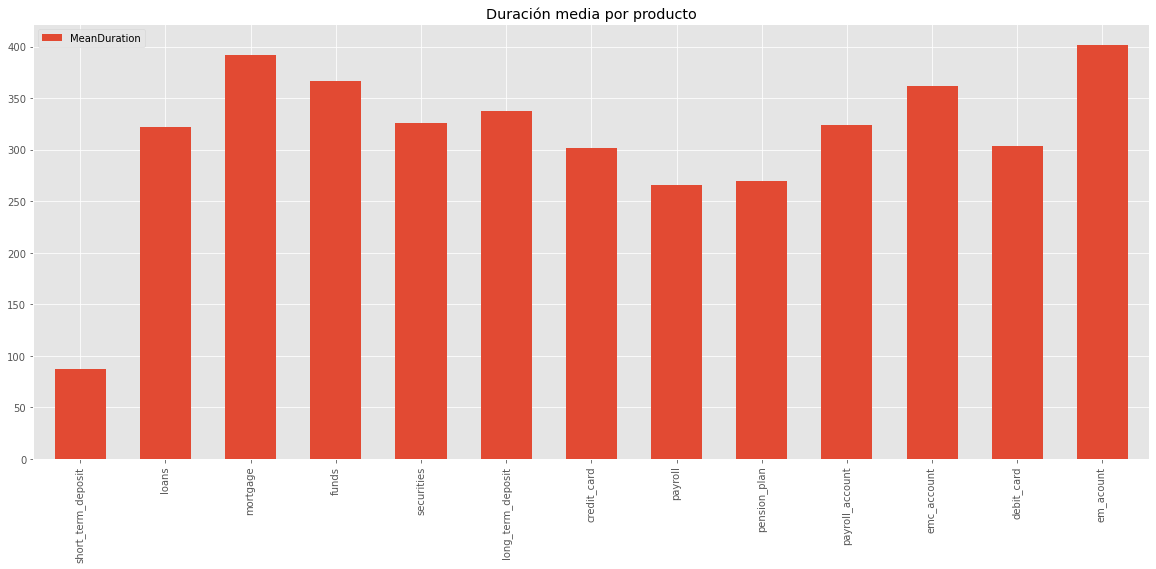

In [75]:
print(mean_duration_df_T)
mean_duration_df_T.plot(kind = "bar", title = "Duración media por producto", width=0.6, figsize=(20,8))

#### Nota: la duración de los productos siempre será relativa, ya que solo hay datos hasta mayo de 2019. Es decir, se tienen en cuenta aquellos contratos de productos que aún siguen en vigor. 

### 2.6 Productos más estables

In [76]:
mean_duration_df_T.sort_values(by="MeanDuration", ascending=False, inplace=True)
mean_duration_df_T.head(3)

MeanDuration
em_acount           402
mortgage            392
funds               367

#### Los productos más estables son "em_acount", "mortgage" y "funds".

### 2.7 Fechas con más bajas y altas

In [77]:
# Fechas con más bajas:

total_var_month["total_month_bajas"].sort_values(ascending=False).head(5)

pk_partition
2019-01-28   18,224.00
2018-11-28   13,839.00
2018-08-28   13,603.00
2018-12-28   13,597.00
2019-04-28   13,257.00
Name: total_month_bajas, dtype: float64

In [78]:
# Fechas con más altas:

total_var_month["total_month_altas"].sort_values(ascending=False).head(5)

pk_partition
2019-02-28   20,855.00
2018-12-28   19,655.00
2018-10-28   18,606.00
2019-05-28   17,009.00
2018-11-28   16,835.00
Name: total_month_altas, dtype: float64

### 2.8 Total de productos por cada cliente

In [79]:
# Calculamos el total de productos por cliente a la fecha más actualizada (28/5/2019)

products_now = products[products["pk_partition"] == "2019-05-28"]
products_now.drop(["Unnamed: 0", "pk_partition"], axis= 1, inplace=True)
products_now.set_index("pk_cid", inplace=True)
products_now.head(10)

short_term_deposit  loans  mortgage  funds  securities  \
pk_cid                                                           
657826                   0      0         0      0           0   
657817                   0      0         0      0           0   
657986                   0      0         0      0           0   
657905                   0      0         0      0           0   
657336                   0      0         0      0           0   
657147                   0      0         0      0           0   
658184                   0      0         0      0           0   
658576                   0      0         0      0           0   
655774                   0      0         0      0           0   
655419                   0      0         0      0           0   

        long_term_deposit  em_account_pp  credit_card  payroll  pension_plan  \
pk_cid                                                                         
657826                  0              0            0     0.00          0.00   
657817                  0              0            0     0.00          0.00   
657986                  0              0            1     1.00          1.00   
657905                  1              0            0     0.00          0.00   
657336                  0              0            0     0.00          0.00   
657147                  0              0            0     0.00          0.00   
658184                  0              0            1     1.00          1.00   
658576                  1              0            0     0.00          0.00   
655774                  0              0            0     0.00          0.00   
655419                  0              0            0     0.00          0.00   

        payroll_account  emc_account  debit_card  em_account_p  em_acount  
pk_cid                                                                     
657826                0            0           0             0          1  
657817                0            0           0             0          0  
657986                1            1           1             0          0  
657905                0            0           0             0          1  
657336                0            0           0             0          1  
657147                0            0           0             0          0  
658184                1            1           1             0          0  
658576                0            0           0             0          0  
655774                0            0           0             0          1  
655419                0            0           0             0          0

In [80]:
sales_now_df = pd.DataFrame(products_now.sum(axis=1), index=products_now.index, columns=["Sales"])
sales_now_df.head(20)

Sales
pk_cid       
657826   1.00
657817   0.00
657986   6.00
657905   2.00
657336   1.00
657147   0.00
658184   6.00
658576   1.00
655774   1.00
655419   0.00
655682   2.00
656163   2.00
656942   0.00
656915   1.00
656215   1.00
656613   1.00
656415   5.00
661519   1.00
661894   0.00
661308   2.00

### 2.9 Evolución Ventas por tipología de producto

#### AHORRO

[Text(0.5, 0, 'Fecha'), Text(0.5, 1.0, 'Evolución Ventas Productos Ahorro')]

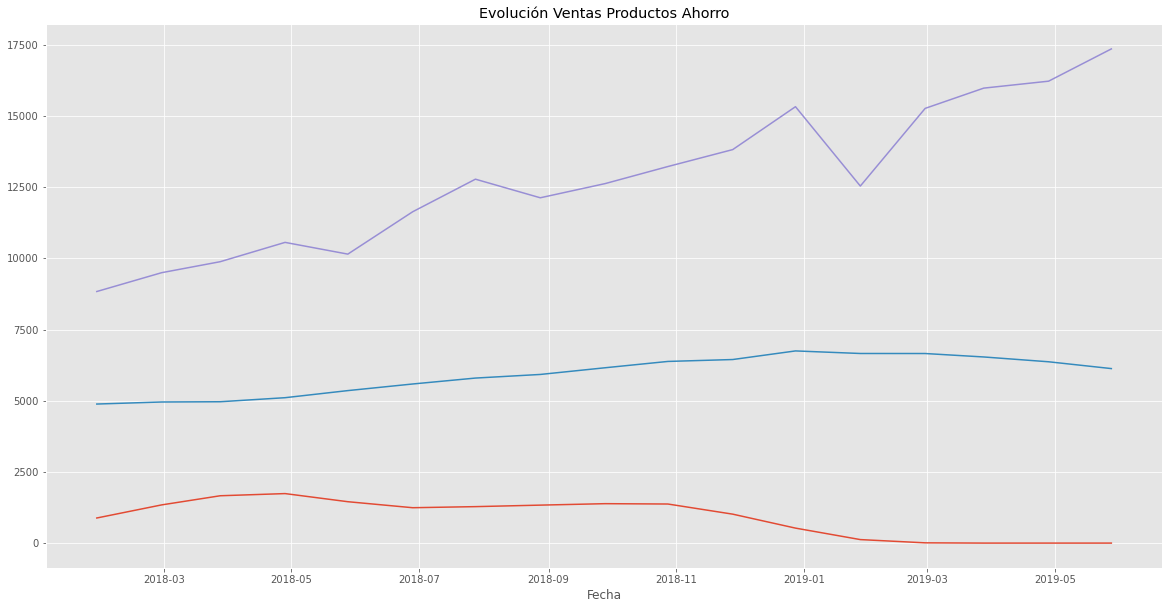

In [81]:
plt.figure(figsize=(20,10))
graph=sns.lineplot(data=total_sales_df["short_term_deposit"], legend='full')
graph=sns.lineplot(data=total_sales_df["long_term_deposit"], legend='full')
graph=sns.lineplot(data=total_sales_df["pension_plan"], legend='full')
graph.set(xlabel='Fecha', title='Evolución Ventas Productos Ahorro')

#### Inversión

[Text(0.5, 0, 'Fecha'), Text(0.5, 1.0, 'Evolución Ventas Productos Inversión')]

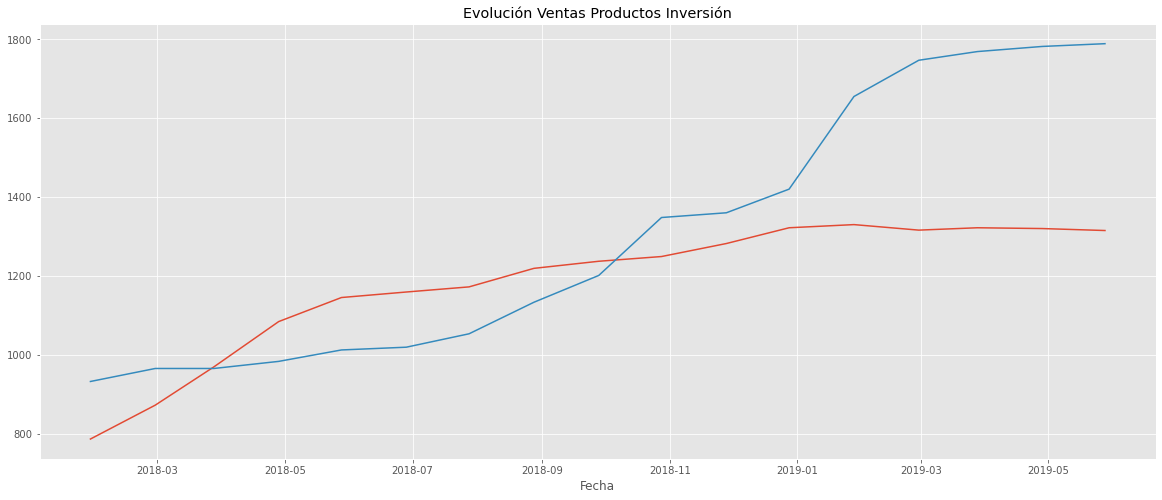

In [82]:
plt.figure(figsize=(20,8))
graph=sns.lineplot(data=total_sales_df["funds"])
graph=sns.lineplot(data=total_sales_df["securities"])
graph.set(xlabel='Fecha', title='Evolución Ventas Productos Inversión')

#### Finaciación

[Text(0.5, 0, 'Fecha'),
 Text(0.5, 1.0, 'Evolución Ventas Productos Financiación')]

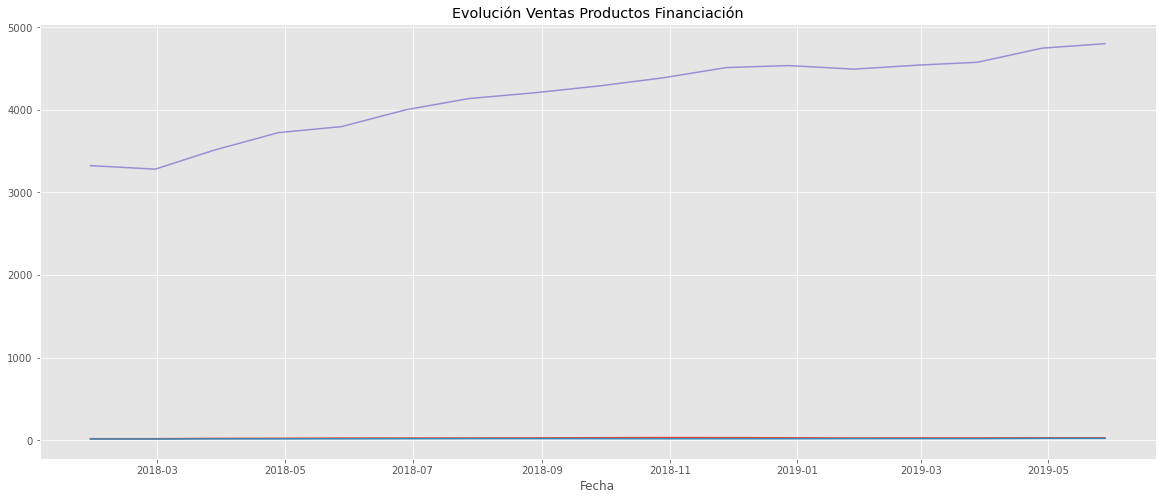

In [83]:
plt.figure(figsize=(20,8))
graph=sns.lineplot(data=total_sales_df["loans"])
graph=sns.lineplot(data=total_sales_df["mortgage"])
graph=sns.lineplot(data=total_sales_df["credit_card"])
graph.set(xlabel='Fecha', title='Evolución Ventas Productos Financiación')

## 3. Análisis de los clientes

In [84]:
pk_cid = full_df["pk_cid"].nunique()

print(f'''Tenemos un total de {pk_cid} clientes únicos''')

Tenemos un total de 456373 clientes únicos


In [85]:
products_now = products[products['pk_partition']=='2019-05-28']
products_now.drop('pk_partition', axis=1, inplace=True)
products_now.set_index("pk_cid", inplace=True)
products_now

Unnamed: 0  short_term_deposit  loans  mortgage  funds  securities  \
pk_cid                                                                        
657826     12715896                   0      0         0      0           0   
657817     12715899                   0      0         0      0           0   
657986     12715982                   0      0         0      0           0   
657905     12716026                   0      0         0      0           0   
657336     12716082                   0      0         0      0           0   
...             ...                 ...    ...       ...    ...         ...   
1166765    13647304                   0      0         0      0           0   
1166764    13647305                   0      0         0      0           0   
1166763    13647306                   0      0         0      0           0   
1166789    13647307                   0      0         0      0           0   
1550586    13647308                   0      0         0      0           0   

         long_term_deposit  em_account_pp  credit_card  payroll  pension_plan  \
pk_cid                                                                          
657826                   0              0            0     0.00          0.00   
657817                   0              0            0     0.00          0.00   
657986                   0              0            1     1.00          1.00   
657905                   1              0            0     0.00          0.00   
657336                   0              0            0     0.00          0.00   
...                    ...            ...          ...      ...           ...   
1166765                  0              0            0     0.00          0.00   
1166764                  0              0            0     0.00          0.00   
1166763                  0              0            0     0.00          0.00   
1166789                  0              0            0     0.00          0.00   
1550586                  0              0            0     0.00          0.00   

         payroll_account  emc_account  debit_card  em_account_p  em_acount  
pk_cid                                                                      
657826                 0            0           0             0          1  
657817                 0            0           0             0          0  
657986                 1            1           1             0          0  
657905                 0            0           0             0          1  
657336                 0            0           0             0          1  
...                  ...          ...         ...           ...        ...  
1166765                0            0           0             0          1  
1166764                0            0           0             0          1  
1166763                0            0           0             0          1  
1166789                0            0           0             0          1  
1550586                0            0           0             0          1  

[442995 rows x 16 columns]

In [86]:
products_now.drop('Unnamed: 0', axis=1, inplace=True)

In [87]:
sales_now_df = pd.DataFrame(products_now.sum(axis=1), columns=['Total_products'])
sales_now_df

Total_products
pk_cid                 
657826             1.00
657817             0.00
657986             6.00
657905             2.00
657336             1.00
...                 ...
1166765            1.00
1166764            1.00
1166763            1.00
1166789            1.00
1550586            1.00

[442995 rows x 1 columns]

In [88]:
full_df = pd.merge(full_df, sales_now_df, on = ["pk_cid"], how = "left")
full_df

pk_cid pk_partition  short_term_deposit  loans  mortgage  funds  \
0        1375586   2018-01-28                   0      0         0      0   
1        1050611   2018-01-28                   0      0         0      0   
2        1050612   2018-01-28                   0      0         0      0   
3        1050613   2018-01-28                   1      0         0      0   
4        1050614   2018-01-28                   0      0         0      0   
...          ...          ...                 ...    ...       ...    ...   
5962919  1166765   2019-05-28                   0      0         0      0   
5962920  1166764   2019-05-28                   0      0         0      0   
5962921  1166763   2019-05-28                   0      0         0      0   
5962922  1166789   2019-05-28                   0      0         0      0   
5962923  1550586   2019-05-28                   0      0         0      0   

         securities  long_term_deposit  em_account_pp  credit_card  ...  \
0                 0                  0              0            0  ...   
1                 0                  0              0            0  ...   
2                 0                  0              0            0  ...   
3                 0                  0              0            0  ...   
4                 0                  0              0            0  ...   
...             ...                ...            ...          ...  ...   
5962919           0                  0              0            0  ...   
5962920           0                  0              0            0  ...   
5962921           0                  0              0            0  ...   
5962922           0                  0              0            0  ...   
5962923           0                  0              0            0  ...   

         entry_channel  active_customer             segment  country_id  \
0                  KHL             1.00   02 - PARTICULARES          ES   
1                  KHE             0.00  03 - UNIVERSITARIO          ES   
2                  KHE             0.00  03 - UNIVERSITARIO          ES   
3                  KHD             0.00  03 - UNIVERSITARIO          ES   
4                  KHE             1.00  03 - UNIVERSITARIO          ES   
...                ...              ...                 ...         ...   
5962919            KHE             0.00  03 - UNIVERSITARIO          ES   
5962920            KHE             0.00  03 - UNIVERSITARIO          ES   
5962921            KHE             1.00   02 - PARTICULARES          ES   
5962922            KHE             0.00  03 - UNIVERSITARIO          ES   
5962923            NaN             1.00                 NaN          ES   

         region_code  gender  age deceased     salary  Total_products  
0              29.00       H   35        N  87,218.10            2.00  
1              13.00       V   23        N  35,548.74            1.00  
2              13.00       V   23        N 122,179.11            1.00  
3              50.00       H   22        N 119,775.54            0.00  
4              50.00       V   23        N        nan            1.00  
...              ...     ...  ...      ...        ...             ...  
5962919        50.00       V   22        N  43,912.17            1.00  
5962920        26.00       V   23        N  23,334.99            1.00  
5962921        50.00       H   47        N        nan            1.00  
5962922        50.00       H   22        N 199,592.82            1.00  
5962923        28.00       H   37        N        nan            1.00  

[5962924 rows x 28 columns]

### 3.1 Fecha de Entrada de Clientes

En un primer vistazo podemos ver que la primera fecha entrada de clientes es el **01-01-2015** y la última **31-05-2019**.

In [89]:
full_df['entry_date'].describe()

count        5962924
unique          1499
top       2017-07-28
freq           57389
Name: entry_date, dtype: object

### 3.2 Evolución entrada clientes por año y mes

In [90]:
commercial.loc[commercial['entry_date'] == '2019-02-29', 'entry_date'] = '2019-02-28'
commercial.loc[commercial['entry_date'] == '2015-02-29', 'entry_date'] = '2015-02-28'

In [91]:
commercial['entry_date'] = pd.to_datetime(commercial['entry_date'], format='%Y-%m-%d')

In [92]:
clients_by_entry_date = pd.DataFrame(commercial.groupby(['entry_date','pk_cid']).size(), columns=['Duration']).reset_index()
clients_by_entry_date['YEAR'] = clients_by_entry_date["entry_date"].dt.year
clients_by_entry_date['MONTH'] = clients_by_entry_date["entry_date"].dt.month
clients_by_entry_date['year_month'] = pd.to_datetime(clients_by_entry_date['entry_date']).dt.to_period('M')
clients_by_entry_date

entry_date   pk_cid  Duration  YEAR  MONTH year_month
0      2015-01-01   622277        17  2015      1    2015-01
1      2015-01-02   177266        17  2015      1    2015-01
2      2015-01-02   388445        17  2015      1    2015-01
3      2015-01-02   427613        17  2015      1    2015-01
4      2015-01-02   892984        13  2015      1    2015-01
...           ...      ...       ...   ...    ...        ...
456375 2019-05-31  1553685         1  2019      5    2019-05
456376 2019-05-31  1553686         1  2019      5    2019-05
456377 2019-05-31  1553687         1  2019      5    2019-05
456378 2019-05-31  1553688         1  2019      5    2019-05
456379 2019-05-31  1553689         1  2019      5    2019-05

[456380 rows x 6 columns]

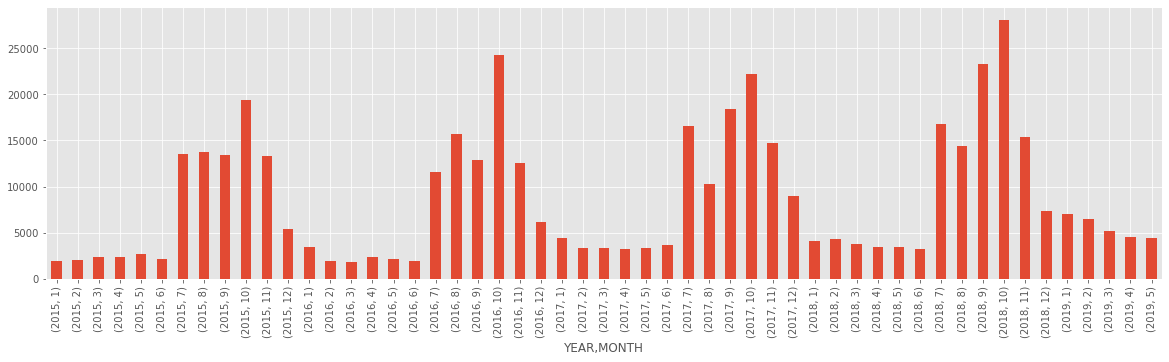

In [93]:
client_by_entry_month = clients_by_entry_date.groupby(['YEAR','MONTH'])['pk_cid'].count()
client_by_entry_month.plot(kind='bar', figsize=(20,5), legend=None)

In [94]:
clients_by_month = clients_by_entry_date.pivot_table(index=['year_month'], values='pk_cid', aggfunc='count')
clients_by_month

pk_cid
year_month        
2015-01       1961
2015-02       2034
2015-03       2343
2015-04       2368
2015-05       2634
2015-06       2147
2015-07      13541
2015-08      13785
2015-09      13432
2015-10      19412
2015-11      13343
2015-12       5349
2016-01       3424
2016-02       1929
2016-03       1787
2016-04       2317
2016-05       2154
2016-06       1934
2016-07      11610
2016-08      15675
2016-09      12829
2016-10      24295
2016-11      12531
2016-12       6107
2017-01       4431
2017-02       3337
2017-03       3294
2017-04       3190
2017-05       3324
2017-06       3656
2017-07      16520
2017-08      10263
2017-09      18372
2017-10      22223
2017-11      14764
2017-12       8988
2018-01       4033
2018-02       4293
2018-03       3753
2018-04       3428
2018-05       3465
2018-06       3257
2018-07      16844
2018-08      14449
2018-09      23284
2018-10      28123
2018-11      15334
2018-12       7304
2019-01       7034
2019-02       6424
2019-03       5134
2019-04       4535
2019-05       4383

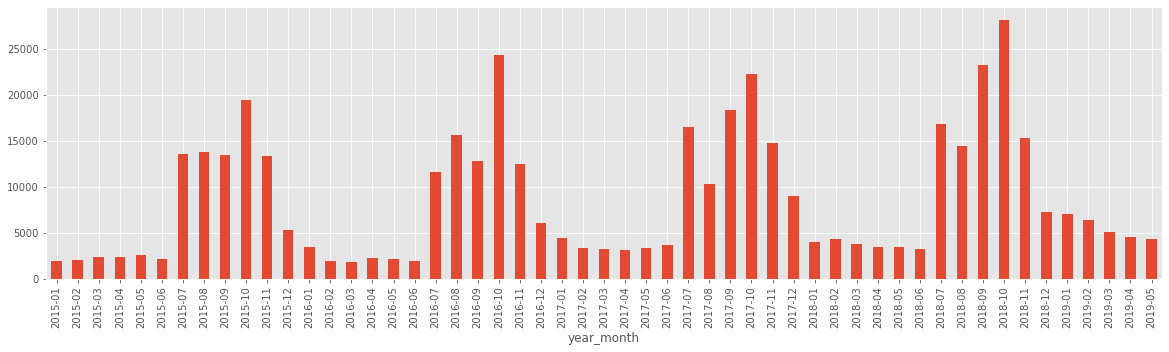

In [95]:
clients_by_month.plot(kind='bar', figsize=(20,5), legend=None)

In [96]:
entry_date_products_df = pd.merge(products, commercial, on = ["pk_cid", "pk_partition"], how = "left")
entry_date_products_df.drop(['pk_partition','entry_channel','active_customer','segment'], axis=1, inplace=True)
entry_date_products_df['year_month'] = pd.to_datetime(entry_date_products_df['entry_date']).dt.to_period('M')
entry_date_products_df

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [96]:
values=['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount']
entry_products = entry_date_products_df.pivot_table(index='year_month', values=values, aggfunc='sum')
entry_products

NameError: name 'entry_date_products_df' is not defined

In [ ]:
entry_products.plot(kind='bar', figsize=(20,10), legend=values)

### 3.3 Canal de Entrada

Existen 69 tipos diferentes de canales de entrada. Pero con las 5 primeros tipologías ya abarcamos el 88% de los casos.

Text(0, 0.5, '')

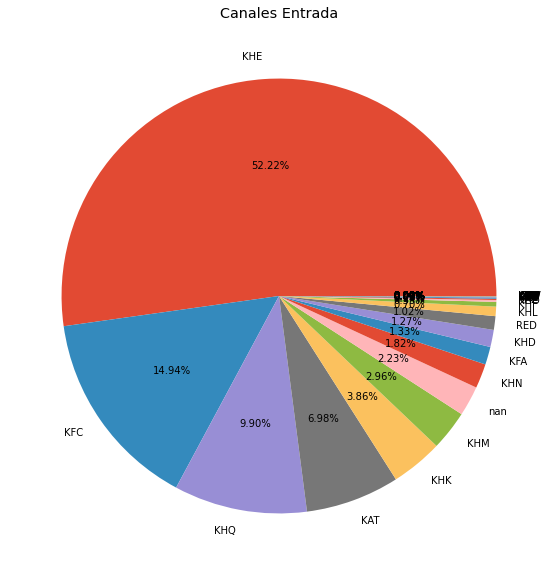

In [97]:
plt.figure(figsize=(30,10))
full_df['entry_channel'].value_counts(dropna=False, normalize=True).plot.pie(autopct='%1.2f%%',shadow=False)
plt.title('Canales Entrada')
plt.ylabel('')

In [98]:
full_df['active_customer'].value_counts(dropna=False, normalize=True)

0.00   0.60
1.00   0.40
Name: active_customer, dtype: float64

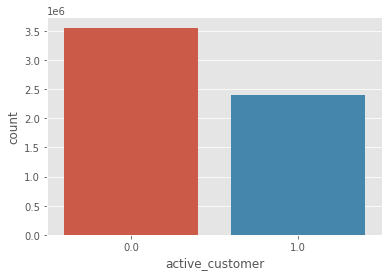

In [99]:
sns.countplot(data=full_df, x='active_customer')

## 4. Generación de valores

In [100]:
products_sorted = products.sort_values(by=['pk_cid', 'pk_partition'])

In [101]:
# Creamos una función para generar valores de diferencia

def ValoresDiferencia(df, column_name, groupby):
    '''
    Creamos valor de diferencia para poder comparar la evolución de los productos respecto al mes anterior
    '''
    df[column_name +'_previous_month'] = df.groupby(groupby)[column_name].shift(1)
    df[column_name + "_dif"] = df[column_name] - df[column_name+'_previous_month']
    
    return df
    

In [102]:
ValoresDiferencia(products_sorted, 'short_term_deposit', 'pk_cid')
ValoresDiferencia(products_sorted, 'loans', 'pk_cid')
ValoresDiferencia(products_sorted, 'mortgage', 'pk_cid')
ValoresDiferencia(products_sorted, 'funds', 'pk_cid')
ValoresDiferencia(products_sorted, 'securities', 'pk_cid')
ValoresDiferencia(products_sorted, 'long_term_deposit', 'pk_cid')
ValoresDiferencia(products_sorted, 'em_account_pp', 'pk_cid')
ValoresDiferencia(products_sorted, 'credit_card', 'pk_cid')
ValoresDiferencia(products_sorted, 'payroll', 'pk_cid')
ValoresDiferencia(products_sorted, 'pension_plan', 'pk_cid')
ValoresDiferencia(products_sorted, 'payroll_account', 'pk_cid')
ValoresDiferencia(products_sorted, 'emc_account', 'pk_cid')
ValoresDiferencia(products_sorted, 'debit_card', 'pk_cid')
ValoresDiferencia(products_sorted, 'em_account_p', 'pk_cid')
ValoresDiferencia(products_sorted, 'em_acount', 'pk_cid')

Unnamed: 0   pk_cid pk_partition  short_term_deposit  loans  \
1479563     4078994    15891   2018-07-28                   0      0   
2168122     5319232    15891   2018-08-28                   0      0   
2962973     7451107    16063   2018-11-28                   0      0   
3628236     8617948    16063   2018-12-28                   0      0   
4028169     9401149    16063   2019-01-28                   0      0   
...             ...      ...          ...                 ...    ...   
5679916    13336818  1553685   2019-05-28                   0      0   
5679915    13336817  1553686   2019-05-28                   0      0   
5679914    13336816  1553687   2019-05-28                   0      0   
5679913    13336815  1553688   2019-05-28                   0      0   
5679912    13336814  1553689   2019-05-28                   0      0   

         mortgage  funds  securities  long_term_deposit  em_account_pp  ...  \
1479563         0      0           0                  0              0  ...   
2168122         0      0           0                  0              0  ...   
2962973         0      0           0                  0              0  ...   
3628236         0      0           0                  0              0  ...   
4028169         0      0           0                  0              0  ...   
...           ...    ...         ...                ...            ...  ...   
5679916         0      0           0                  0              0  ...   
5679915         0      0           0                  0              0  ...   
5679914         0      0           0                  0              0  ...   
5679913         0      0           0                  0              0  ...   
5679912         0      0           0                  0              0  ...   

         payroll_account_previous_month  payroll_account_dif  \
1479563                             nan                  nan   
2168122                            0.00                 0.00   
2962973                             nan                  nan   
3628236                            0.00                 0.00   
4028169                            0.00                 0.00   
...                                 ...                  ...   
5679916                             nan                  nan   
5679915                             nan                  nan   
5679914                             nan                  nan   
5679913                             nan                  nan   
5679912                             nan                  nan   

         emc_account_previous_month  emc_account_dif  \
1479563                         nan              nan   
2168122                        0.00             0.00   
2962973                         nan              nan   
3628236                        0.00             0.00   
4028169                        0.00             0.00   
...                             ...              ...   
5679916                         nan              nan   
5679915                         nan              nan   
5679914                         nan              nan   
5679913                         nan              nan   
5679912                         nan              nan   

         debit_card_previous_month  debit_card_dif  \
1479563                        nan             nan   
2168122                       0.00            0.00   
2962973                        nan             nan   
3628236                       0.00            0.00   
4028169                       0.00            0.00   
...                            ...             ...   
5679916                        nan             nan   
5679915                        nan             nan   
5679914                        nan             nan   
5679913                        nan             nan   
5679912                        nan             nan   

         em_account_p_previous_month  em_account_p_dif  \
1479563                          nan          

In [103]:
full_df["YEAR"] = full_df["pk_partition"].dt.year
full_df["MONTH"] = full_df["pk_partition"].dt.month
full_df["WEAK"] = full_df["pk_partition"].dt.week

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,6), dpi = 80)
plot_pacf(full_df.set_index("pk_partition").resample("M")["item_cnt_day"].sum(), ax = ax1, lags = 13)
plot_pacf(full_df.set_index("pk_partition").resample("M")["item_cnt_day"].sum(), ax = ax2, lags = 13);

NameError: name 'plot_pacf' is not defined

## 5.Análisis de las tendencias

In [3]:

def create_df():
    
    products=pd.read_csv("products_df.csv", sep=",")
    commercial=pd.read_csv("commercial_activity_df.csv", sep=",")
    sociodemographic=pd.read_csv("sociodemographic_df.csv", sep=",")    
    
    # create df by merging the previous dataframes
    df = pd.merge(products, sociodemographic, on = ['pk_cid','pk_partition'])
    df = pd.merge(df,commercial, on = ['pk_cid','pk_partition'])
    
    df["pk_partition"] = pd.to_datetime(df["pk_partition"], format = "%Y.%m.%d")
        
    return df

In [4]:
df = create_df()

In [5]:
df.drop(['Unnamed: 0','Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)

In [6]:
df.head()

pk_cid pk_partition  short_term_deposit  loans  mortgage  funds  \
0  1375586   2018-01-28                   0      0         0      0   
1  1050611   2018-01-28                   0      0         0      0   
2  1050612   2018-01-28                   0      0         0      0   
3  1050613   2018-01-28                   1      0         0      0   
4  1050614   2018-01-28                   0      0         0      0   

   securities  long_term_deposit  em_account_pp  credit_card  ...  country_id  \
0           0                  0              0            0  ...          ES   
1           0                  0              0            0  ...          ES   
2           0                  0              0            0  ...          ES   
3           0                  0              0            0  ...          ES   
4           0                  0              0            0  ...          ES   

   region_code  gender  age  deceased     salary  entry_date entry_channel  \
0        29.00       H   35         N  87,218.10  2018-01-12           KHL   
1        13.00       V   23         N  35,548.74  2015-08-10           KHE   
2        13.00       V   23         N 122,179.11  2015-08-10           KHE   
3        50.00       H   22         N 119,775.54  2015-08-10           KHD   
4        50.00       V   23         N        nan  2015-08-10           KHE   

   active_customer             segment  
0             1.00   02 - PARTICULARES  
1             0.00  03 - UNIVERSITARIO  
2             0.00  03 - UNIVERSITARIO  
3             0.00  03 - UNIVERSITARIO  
4             1.00  03 - UNIVERSITARIO  

[5 rows x 27 columns]

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
 17  country_id          object        
 18  region_code         float64       
 19  gender              object        
 20  ag

In [8]:
df.isnull().sum()

pk_cid                      0
pk_partition                0
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1512103
entry_date                  0
entry_channel          133033
active_customer             0
segment                133944
dtype: int64

In [9]:
media1 = df['payroll'].median()
media2 = df ['pension_plan'].median()
mean1 = df['salary'].mean()

df['payroll'].replace(np.nan,media1, inplace=True)
df ['pension_plan'].replace(np.nan,media2, inplace=True)
df['salary'].replace(np.nan,mean1, inplace=True)

In [10]:
moda1 = df['region_code'].mode().values[0]
moda2 = df['gender'].mode().values[0]
moda3 = df['entry_channel'].mode().values[0]
moda4 = df['segment'].mode().values[0]

df['region_code'].replace(np.nan, moda1, inplace=True)
df['gender'].replace(np.nan, moda2, inplace=True)
df['entry_channel'].replace(np.nan, moda3, inplace=True)
df['segment'].replace(np.nan, moda4, inplace=True)

In [11]:
df.isnull().sum()

pk_cid                0
pk_partition          0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
country_id            0
region_code           0
gender                0
age                   0
deceased              0
salary                0
entry_date            0
entry_channel         0
active_customer       0
segment               0
dtype: int64

In [ ]:
df.sum().sort_values(ascending=False)

In [13]:
full_df = df.pivot_table(index='pk_partition', values=['loans','mortgage','funds','securities','long_term_deposit','em_account_pp','credit_card','payroll','pension_plan','payroll_account','emc_account','debit_card','em_account_p','em_acount'], aggfunc=[sum])
full_df

sum                                                  \
             credit_card debit_card em_account_p em_account_pp em_acount   
pk_partition                                                               
2018-01-28          3325      24696            2             0    215293   
2018-02-28          3282      25448            2             0    217098   
2018-03-28          3511      27046            2             0    218683   
2018-04-28          3725      27764            2             0    219816   
2018-05-28          3797      27911            2             0    221291   
2018-06-28          4002      28828            2             0    224328   
2018-07-28          4137      29578            2             0    234324   
2018-08-28          4206      29205            2             0    245980   
2018-09-28          4289      31684            2             0    261210   
2018-10-28          4385      34372            2             0    277707   
2018-11-28          4512      35466            2             0    284900   
2018-12-28          4536      37430            2             0    288928   
2019-01-28          4493      37350            2             0    291786   
2019-02-28          4542      39399            2             0    292988   
2019-03-28          4576      41390            2             0    295046   
2019-04-28          4747      42140            2             0    295844   
2019-05-28          4801      43261            2             0    296380   

                                                                           \
             emc_account funds loans long_term_deposit mortgage   payroll   
pk_partition                                                                
2018-01-28         15320   786    19              4884       15  8,145.00   
2018-02-28         15827   872    19              4956       15  8,889.00   
2018-03-28         16428   969    23              4965       17  9,735.00   
2018-04-28         16947  1084    24              5107       17  9,905.00   
2018-05-28         17569  1145    27              5356       18  9,994.00   
2018-06-28         17950  1159    27              5588       19 10,946.00   
2018-07-28         18185  1172    28              5796       20 11,888.00   
2018-08-28         18333  1219    29              5923       20 11,383.00   
2018-09-28         18618  1237    31              6158       20 11,850.00   
2018-10-28         18844  1249    33              6380       19 12,454.00   
2018-11-28         19494  1282    32              6447       19 13,032.00   
2018-12-28         20043  1322    30              6749       19 14,452.00   
2019-01-28         20921  1330    28              6659       20 12,058.00   
2019-02-28         21796  1316    29              6658       20 14,378.00   
2019-03-28         22480  1322    29              6537       20 15,114.00   
2019-04-28         23455  1320    30              6368       23 15,231.00   
2019-05-28         24751  1315    30              6129       23 16,333.00   

                                                      
             payroll_account pension_plan securities  
pk_partition                                          
2018-01-28             13478     8,835.00        932  
2018-02-28             14246     9,496.00        965  
2018-03-28             14989     9,882.00        965  
2018-04-28             15825    10,560.00        983  
2018-05-28             16697    10,148.00       1012  
2018-06-28             15540    11,635.00       1019  
2018-07-28             16916    12,779.00       1053  
2018-08-28             18118    12,126.00       1133  
2018-09-28             18862    12,624.00       1201  
2018-10-28             19945    13,223.00       1348  
2018-11-28             21437    13,818.00       1360  
2018-12-28             21359    15,324.00       1420  
2019-01-28             22324    12,538.00       1655  
2019-02-28             23264    15,265.00       1747  
2019-03-28             2

### 5.1 Top y Bottom 5 Productos

In [ ]:
df.sum().sort_values(ascending=False)

### 5.2 Gráfico Top 5 Productos Por Mes

In [ ]:
top5cuentas = ['emc_account','payroll','em_acount','debit_card','pension_plan']
grafico_cuentas = df.groupby(['pk_partition'])[top5cuentas].sum()

index_cuentas=np.arange(len(top5cuentas))
print(index_cuentas)

score_label = np.arange(0,110,10)
print(grafico_cuentas.T)


bar_width = 0.35

plt.figure(figsize=(12, 8))
fig = grafico_cuentas.plot(kind='bar')
fig.set_xlabel('Año')
fig.set_ylabel('Cantidad')

### 5.3 Gráfico Bottom 6 Productos Por Mes

In [121]:
bottom5cuentas = ['loans','mortgage','funds','em_account_pp','em_account_p', 'securities']
grafico_cuentas = df.groupby(['pk_partition'])[bottom5cuentas].sum()

index_cuentas=np.arange(len(bottom5cuentas))
print(index_cuentas)

score_label = np.arange(0,110,10)
print(grafico_cuentas.T)

#print(grafico_cuentas)
#grafico_cuentas.plot.bar()

bar_width = 0.35

plt.figure(figsize=(12, 8))
fig = grafico_cuentas.plot(kind='bar')
fig.set_xlabel('Cantidad')
fig.set_ylabel('Año')


### 5.4 Análisis detallado de ultimos producto: puesto 5 y 6

In [122]:
bottom5cuenta = ['securities','funds']
grafico_cuentas = df.groupby(['pk_partition'])[bottom5cuenta].sum()

index_cuentas=np.arange(len(bottom5cuenta))
print(index_cuentas)

score_label = np.arange(0,110,10)
print(grafico_cuentas.T)

#print(grafico_cuentas)
#grafico_cuentas.plot.bar()

bar_width = 0.35

plt.figure(figsize=(12, 8))
fig = grafico_cuentas.plot(kind='bar')
fig.set_xlabel('Cantidad')
fig.set_ylabel('Año')

### 5.5 Análisis de Ventas Por País

In [123]:
df1 = df.loc[:,['pk_partition','country_id','loans','mortgage','funds','securities','long_term_deposit','em_account_pp','credit_card','payroll','pension_plan','payroll_account','emc_account','debit_card','em_account_p','em_acount']]
df1 = df1.groupby(['pk_partition','country_id'], as_index=False).agg(sum)
df1 = df1[df1['pk_partition'] == '2018-01-28']
df1

df1["total_sales_month"]=df1.sum(axis=1)
df1

In [124]:
df2 = df.loc[:,['pk_partition','country_id','loans','mortgage','funds','securities','long_term_deposit','em_account_pp','credit_card','payroll','pension_plan','payroll_account','emc_account','debit_card','em_account_p','em_acount']]
df2 = df1.groupby(['country_id'], as_index=False).agg(sum)
df2.sort_values(by='total_sales_month', ascending=True)

In [125]:
sns.catplot(x="country_id", y="em_acount", kind="box", data=df2)

### 5.6 Analisis por segmento

In [126]:
df3 = df.loc[:,['segment','loans','mortgage','funds','securities','long_term_deposit','em_account_pp','credit_card','payroll','pension_plan','payroll_account','emc_account','debit_card','em_account_p','em_acount']]
df3 = df3.groupby(['segment'], as_index=False).agg(sum)

df3

## RESUMEN DE DATASETS CREADOS PARA EL ANÁLISIS

#### Previamente se han creado los siguientes Dataframes que ilustran la situación actual de la cartera de clientes y productos:
- full_df : dataframe que engloba los datasets originales.
- total_sales_df : dataframe con la evolución de ventas mensual  , es decir, el nº de clientes por mes. 
- sales_by_segment : dataframe con los datos de segment de clientes clasificados por fecha. 
- total_dif : dataframe con los datos de altas y bajas por producto clasificados por fecha.
- dates_(product) : dataframes de cada producto con la fecha de alta y baja de cada cliente. 
- total_var_month : variación de las altas y bajas totales al mes.
- mean_duration_df : dataframe con los datos de duración media de cada producto.
- sales_now_df: dataframe con cantidad de productos contratos por cada cliente actualmente.